# Copy Number Pipeline

In [6]:
from __future__ import print_function
import os.path
import pandas as pd
from IPython.display import Image,display
import dalmatian as dm
from IPython.core.display import HTML 
from CCLE_postp_function import *
import sys
sys.path.insert(0, '../JKBio/')
import TerraFunction as terra
%load_ext autoreload
%autoreload 2
%load_ext rpy2.ipython
from taigapy import TaigaClient
tc = TaigaClient()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [7]:
namespace1="broad-genomics-delivery"
workspace1="Getz_IBM_CellLines_Exomes"
namespace2="broad-firecloud-ccle"
workspace2="CCLE_DepMap_WES"
namespace3="broad-genomics-delivery"
workspace3="CCLE_DepMap_WES"
refnamespace="broad-firecloud-ccle"
refworkspace="DepMap_WES_CN_HG38"
source1="ibm"
source2="ccle"
source3="ccle"
sample_set_id = "19Q3"
release = sample_set_id

In [8]:
wm1 = dm.WorkspaceManager(namespace1, workspace1)
wm2 = dm.WorkspaceManager(namespace2, workspace2)
wm3 = dm.WorkspaceManager(namespace3, workspace3)
refwm = dm.WorkspaceManager(refnamespace, refworkspace)

In [27]:
othersamples= ['ibm_ACH-002446',
 'ibm_ACH-000658',
 'ibm_ACH-001802',
 'ibm_ACH-002015',
 'ibm_ACH-002018',
 'ibm_ACH-001279',
 'ibm_ACH-001862']

In [35]:
newsample = createDatasetWithNewCellLines(refwm, sample_set_id, wm3, source3)

/Users/jeremie/Documents/Projects/BroadInstitute/ccle_processing/CCLE_postp_function.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (samples1['individual_alias'].str.slice(0, 10).isin(forcekeep))]


uploading new samples
Successfully imported 1595 participants.
Updating many hound records. Switching to batch updates
Hound executing batch upload of 2 records
Successfully imported 1820 samples.
Updating many hound records. Switching to batch updates
Hound executing batch upload of 273002 records
creating a sample set
Sample set "19Q3" (14 samples) successfully updated.


In [ ]:
terra.addToSampleSet(refwm,sample_set_id,othersamples)

# ReaLign in HG38

In [38]:
bamtoubam= "BamToUnmappedRGBams_MC"
ubamtofilelist = "Generate_uBAM_File_List"
realign="Realign_WES_GATK4"

In [39]:
bamtoubam = refwm.get_config(bamtoubam)

{'deleted': False,
 'inputs': {'BamToUnmappedRGBamsWf.input_bam': 'this.WES_bam',
  'BamToUnmappedRGBamsWf.preemptible_tries': '3',
  'BamToUnmappedRGBamsWf.ValidateSamFile.java_opt': '"-Xmx3000m"',
  'BamToUnmappedRGBamsWf.picard_docker': '"broadinstitute/genomes-in-the-cloud:2.3.1-1504795437"',
  'BamToUnmappedRGBamsWf.ref_fasta_index': 'workspace.ref_fasta_fai',
  'BamToUnmappedRGBamsWf.RevertBamToUnmappedRGBams.disk_size': '400',
  'BamToUnmappedRGBamsWf.SortBamByQueryname.mem_size': '"3500 MB"',
  'BamToUnmappedRGBamsWf.RevertBamToUnmappedRGBams.mem_size': '"3000 MB"',
  'BamToUnmappedRGBamsWf.RevertBamToUnmappedRGBams.output_dir': '"."',
  'BamToUnmappedRGBamsWf.SortBamByQueryname.disk_size': '400',
  'BamToUnmappedRGBamsWf.RevertBamToUnmappedRGBams.java_opt': '"-Xmx1200m"',
  'BamToUnmappedRGBamsWf.picard_path': '"/usr/gitc/"',
  'BamToUnmappedRGBamsWf.SortBamByQueryname.java_opt': '"-Xmx3000m"',
  'BamToUnmappedRGBamsWf.ref_fasta': 'workspace.ref_fasta',
  'BamToUnmappedRGBamsW

In [40]:
refwm.update_config(bamtoubam)
subid = refwm.create_submission(bamtoubam['name'],sample_set_id,"sample_set","this.samples")

Successfully updated configuration vdauwera/BamToUnmappedRGBams_MC
Successfully created submission af706cda-e9e7-4bd4-a542-df2de4e33ec2.


In [44]:
terra.waitForSubmission(refwm, subid)

1.0 of jobs Succeeded in submission 0.sion 0. 114 mn elapsed..


[]

In [46]:
ubamtofilelist = refwm.get_config(ubamtofilelist)
ubamtofilelist

{'deleted': False,
 'inputs': {'ArrayToTxt_workflow.CreateTxt.array_of_files': 'this.readgroup_ubams',
  'ArrayToTxt_workflow.CreateTxt.list_name': 'this.name'},
 'methodConfigVersion': 3,
 'methodRepoMethod': {'methodName': 'ArrayOfFilesToTxt',
  'methodVersion': 1,
  'methodNamespace': 'gkugener',
  'methodUri': 'agora://gkugener/ArrayOfFilesToTxt/1',
  'sourceRepo': 'agora'},
 'name': 'Generate_uBAM_File_List',
 'namespace': 'gkugener',
 'outputs': {'ArrayToTxt_workflow.CreateTxt.file_list_name': 'this.unmapped_bams_list'},
 'prerequisites': {},
 'rootEntityType': 'sample'}

In [47]:
refwm.update_config(ubamtofilelist)
subid = refwm.create_submission(ubamtofilelist['name'],sample_set_id,"sample_set","this.samples")

Successfully updated configuration gkugener/Generate_uBAM_File_List
Successfully created submission 9812da31-9344-4370-998a-dafebd9cd674.


In [48]:
terra.waitForSubmission(refwm, subid)

1.0 of jobs Succeeded in submission 0.sion 0. 9 mn elapsed..


[]

In [49]:
realign = refwm.get_config(realign)
realign

{'deleted': False,
 'inputs': {'PreProcessingForVariantDiscovery_GATK4.dbSNP_vcf': 'workspace.dbsnp_138',
  'PreProcessingForVariantDiscovery_GATK4.gatk_launch_path': '"/gatk/"',
  'PreProcessingForVariantDiscovery_GATK4.SamToFastqAndBwaMem.ref_amb': 'workspace.ref_bwa_amb',
  'PreProcessingForVariantDiscovery_GATK4.agg_preemptible_tries': '1',
  'PreProcessingForVariantDiscovery_GATK4.ref_fasta_index': 'workspace.ref_fasta_fai',
  'PreProcessingForVariantDiscovery_GATK4.GetBwaVersion.mem_size': '"16 GB"',
  'PreProcessingForVariantDiscovery_GATK4.unmapped_bam_suffix': '".bam"',
  'PreProcessingForVariantDiscovery_GATK4.ref_dict': 'workspace.ref_dict',
  'PreProcessingForVariantDiscovery_GATK4.SortAndFixTags.java_opt_sort': '"-Xms4000m"',
  'PreProcessingForVariantDiscovery_GATK4.gotc_docker': '"broadinstitute/genomes-in-the-cloud:2.3.0-1501082129"',
  'PreProcessingForVariantDiscovery_GATK4.picard_docker': '"broadinstitute/genomes-in-the-cloud:2.3.0-1501082129"',
  'PreProcessingForVa

In [50]:
refwm.update_config(realign)
subid = refwm.create_submission(realign['name'],sample_set_id,"sample_set","this.samples")

Successfully updated configuration gatk/Realign_WES_GATK4
Successfully created submission cf48f960-5b80-4b20-bb34-892f95baa98d.


In [4]:
terra.waitForSubmission(refwm, subid)

NameError: name 'subid' is not defined

In [ ]:
refwm.create_submission()

In [9]:
CNV_woXY = refwm.get_config("CNV_sample_XX")
CNV_woXY

{'deleted': False,
 'inputs': {'CNVSomaticPairWorkflow.preemptible_attempts': '5',
  'CNVSomaticPairWorkflow.oncotator_docker': '',
  'CNVSomaticPairWorkflow.mem_gb_for_call_copy_ratio_segments': '',
  'CNVSomaticPairWorkflow.num_smoothing_iterations_per_fit': '',
  'CNVSomaticPairWorkflow.ModelSegmentsNormal.output_dir': '',
  'CNVSomaticPairWorkflow.PlotModeledSegmentsTumor.output_dir': '',
  'CNVSomaticPairWorkflow.calling_copy_ratio_z_score_threshold': '',
  'CNVSomaticPairWorkflow.minor_allele_fraction_prior_alpha': '',
  'CNVSomaticPairWorkflow.ModelSegmentsTumor.output_dir': '',
  'CNVSomaticPairWorkflow.gatk_docker': 'workspace.gatk_docker',
  'CNVSomaticPairWorkflow.num_changepoints_penalty_factor': '',
  'CNVSomaticPairWorkflow.common_sites': 'workspace.common_sites_hg38',
  'CNVSomaticPairWorkflow.tumor_bam_idx': 'this.hg38_analysis_ready_bam_index',
  'CNVSomaticPairWorkflow.PlotModeledSegmentsNormal.cpu': '',
  'CNVSomaticPairWorkflow.mem_gb_for_oncotator': '',
  'CNVSomat

In [10]:
refwm.update_config(CNV_woXY)
submission_id = refwm.create_submission(CNV_woXY['name'],etype='sample_set',entity=sample_set_id,expression='this.samples')

Successfully updated configuration gatk/CNV_sample_XX
Successfully created submission 8fde7f8c-0aab-442f-834b-97350b4b4327.


In [12]:
terra.waitForSubmission(refwm,submission_id)

1.0 of jobs Succeeded in submission 0.sion 0. 6 mn elapsed..


[]

In [13]:
aggregate = refwm.get_config("Aggregate_CN_seg_files")
aggregate

{'deleted': False,
 'inputs': {'aggregate_CN_segments_wrkflw.aggregate_CN_segments.disk_space': '10',
  'aggregate_CN_segments_wrkflw.aggregate_CN_segments.num_preempt': '5',
  'aggregate_CN_segments_wrkflw.aggregate_CN_segments.aggregate_seg_files_script': 'workspace.cn_single_file_script',
  'aggregate_CN_segments_wrkflw.aggregate_CN_segments.memory': '5',
  'aggregate_CN_segments_wrkflw.aggregate_CN_segments.sample_set_id': 'this.name',
  'aggregate_CN_segments_wrkflw.aggregate_CN_segments.sample_seg_files': 'this.samples.called_copy_ratio_segments_tumor'},
 'methodConfigVersion': 4,
 'methodRepoMethod': {'methodName': 'Aggregate_CN_seg_files',
  'methodVersion': 2,
  'methodNamespace': 'gkugener',
  'methodUri': 'agora://gkugener/Aggregate_CN_seg_files/2',
  'sourceRepo': 'agora'},
 'name': 'Aggregate_CN_seg_files',
 'namespace': 'gkugener',
 'outputs': {'aggregate_CN_segments_wrkflw.aggregate_CN_segments.combined_cn_file': 'this.combined_seg_file'},
 'prerequisites': {},
 'rootEnt

In [14]:
submission_id = refwm.create_submission(aggregate['name'],entity=sample_set_id)

Successfully created submission d6c36240-c7af-4d32-8799-a341ee234989.


In [15]:
terra.waitForSubmission(refwm,submission_id)

1.0 of jobs Succeeded in submission 0.sion 0. 8 mn elapsed.


[]

In [60]:
aggregated = refwm.get_entities('sample_set').loc[sample_set_id]["combined_seg_file"]
aggregated

'gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d268324/d6c36240-c7af-4d32-8799-a341ee234989/aggregate_CN_segments_wrkflw/39545542-1d65-41d2-bd7d-b51bb6600fff/call-aggregate_CN_segments/19Q3.called.seg'

In [17]:
! gsutil cp $aggregated "temp/cnv_ccle.called.seg"



Updates are available for some Cloud SDK components.  To install them,
please run:
  $ gcloud components update

Copying gs://fc-secure-d2a2d895-a7af-4117-bdc7-652d7d268324/d6c36240-c7af-4d32-8799-a341ee234989/aggregate_CN_segments_wrkflw/39545542-1d65-41d2-bd7d-b51bb6600fff/call-aggregate_CN_segments/19Q3.called.seg...
/ [1 files][146.8 KiB/146.8 KiB]                                                
Operation completed over 1 objects/146.8 KiB.                                    


In [18]:
%%R
source('../JKBio/gkugener/RScripts/load_libraries_and_annotations.R')

2019-07-09 10:57:12::WARNING  R[write to console]: 
Attachement du package : ‘dplyr’


2019-07-09 10:57:12::WARNING  R[write to console]: The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


2019-07-09 10:57:12::WARNING  R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


2019-07-09 10:57:12::WARNING  R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


2019-07-09 10:57:13::WARNING  R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

2019-07-09 10:57:13::WARNING  R[write to console]: ✔ ggplot2 3.2.0     ✔ readr   1.3.1
✔ tibble  2.1.3     ✔ purrr   0.3.2
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ ggplot2 3.2.0     ✔ forcats 0.4.0

2019-07-09 10:57:13::WARNING  R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_confl

2019-07-09 10:57:14::WARNING  R[write to console]: 
Attachement du package : ‘S4Vectors’


2019-07-09 10:57:14::WARNING  R[write to console]: The following objects are masked from ‘package:data.table’:

    first, second


2019-07-09 10:57:14::WARNING  R[write to console]: The following object is masked from ‘package:plotly’:

    rename


2019-07-09 10:57:14::WARNING  R[write to console]: The following object is masked from ‘package:tidyr’:

    expand


2019-07-09 10:57:14::WARNING  R[write to console]: The following objects are masked from ‘package:dplyr’:

    first, rename


2019-07-09 10:57:14::WARNING  R[write to console]: The following object is masked from ‘package:plyr’:

    rename


2019-07-09 10:57:14::WARNING  R[write to console]: The following object is masked from ‘package:base’:

    expand.grid


2019-07-09 10:57:14::WARNING  R[write to console]: Le chargement a nécessité le package : IRanges

2019-07-09 10:57:15::WARNING  R[write to console]: 
Attachement du package 

In [100]:
%%R
genome_version <- 'hg38'
release <- '19Q3'
hg38_cyto_band_reference <- 'data/hg38_cytoband.gz'
new_samples_copy_number_broad_wes <- 'temp/cnv_ccle.called.seg'

In [101]:
%%R
source("CCLE_postp_function.R")

In [20]:
%%R
# Previous release copy number profiles. This line will need to be updated as well
wes.priority.cn.seg.profiles <- taigr::load.from.taiga(data.name='segmented-cn-wes-prioritzed-7fe1', data.file='wes.19Q3.segmented') %>%
  dplyr::select(DepMap_ID, Chromosome, Start, End, Num_Probes, Segment_Mean, Source)

Fetching https://cds.team/taiga/api/datafile?format=metadata&dataset_permaname=segmented-cn-wes-prioritzed-7fe1&datafile_name=wes.19Q3.segmented 
Status 200 


2019-07-09 10:57:18::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Could not find segmented-cn-wes-prioritzed-7fe1 in cache, requesting from taiga...
Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.segmented 
Status 200 


2019-07-09 10:57:18::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Taiga needs to convert data to rds before we can fetch it.  Waiting...
Conversion pending 
Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.segmented 
Status 200 


2019-07-09 10:57:19::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Running conversion 
Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.segmented 
Status 200 


2019-07-09 10:57:21::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.segmented 
Status 200 


2019-07-09 10:57:23::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.segmented 
Status 200 


2019-07-09 10:57:27::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.segmented 
Status 200 


2019-07-09 10:57:32::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.

2019-07-09 10:57:32::WARNING  R[write to console]: Downloading segmented-cn-wes-prioritzed-7fe1/v30/wes.19Q3.segmented ...



  |======================================================================| 100%
Saving segmented-cn-wes-prioritzed-7fe1 in cache ( 23ce65e0b1c147f29d2cc82dc79d3aac wes.19Q3.segmented )...


2019-07-09 10:57:39::WARNING  R[write to console]: Saved to cache as 23ce65e0b1c147f29d2cc82dc79d3aac_wes-19q3-segmented.rds



writing /Users/jeremie/.taiga/23ce65e0b1c147f29d2cc82dc79d3aac_wes-19q3-segmented.idx /Users/jeremie/.taiga/segmented-cn-wes-prioritzed-7fe1_wes-19q3-segmented_30.idx 
Fetching https://cds.team/taiga/api/datafile?format=metadata&dataset_permaname=segmented-cn-wes-prioritzed-7fe1&datafile_name=wes.19Q3.gene 
Status 200 


2019-07-09 10:57:39::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Could not find segmented-cn-wes-prioritzed-7fe1 in cache, requesting from taiga...
Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.gene 
Status 200 


2019-07-09 10:57:39::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Taiga needs to convert data to rds before we can fetch it.  Waiting...
Conversion pending 
Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.gene 
Status 200 


2019-07-09 10:57:41::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.gene 
Status 200 


2019-07-09 10:57:42::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.gene 
Status 200 


2019-07-09 10:57:45::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Running conversion 
Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.gene 
Status 200 


2019-07-09 10:57:48::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.gene 
Status 200 


2019-07-09 10:57:53::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.gene 
Status 200 


2019-07-09 10:58:01::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.



Fetching https://cds.team/taiga/api/datafile?format=rds&dataset_version_id=23ce65e0b1c147f29d2cc82dc79d3aac&datafile_name=wes.19Q3.gene 
Status 200 


2019-07-09 10:58:11::WARNING  R[write to console]: No encoding supplied: defaulting to UTF-8.

2019-07-09 10:58:11::WARNING  R[write to console]: Downloading segmented-cn-wes-prioritzed-7fe1/v30/wes.19Q3.gene ...



  |======================================================================| 100%


2019-07-09 10:58:16::WARNING  R[write to console]: Downloading segmented-cn-wes-prioritzed-7fe1/v30/wes.19Q3.gene ...



  |======================================================================| 100%


2019-07-09 10:58:24::WARNING  R[write to console]: Downloading segmented-cn-wes-prioritzed-7fe1/v30/wes.19Q3.gene ...



  |======================================================================| 100%


2019-07-09 10:58:30::WARNING  R[write to console]: Downloading segmented-cn-wes-prioritzed-7fe1/v30/wes.19Q3.gene ...



  |======================================================================| 100%


2019-07-09 10:58:38::WARNING  R[write to console]: Downloading segmented-cn-wes-prioritzed-7fe1/v30/wes.19Q3.gene ...



  |======================================================================| 100%


2019-07-09 10:58:45::WARNING  R[write to console]: Downloading segmented-cn-wes-prioritzed-7fe1/v30/wes.19Q3.gene ...



  |======================================================================| 100%


2019-07-09 10:58:53::WARNING  R[write to console]: Downloading segmented-cn-wes-prioritzed-7fe1/v30/wes.19Q3.gene ...



  |======================================================================| 100%


2019-07-09 10:58:57::WARNING  R[write to console]: Downloading segmented-cn-wes-prioritzed-7fe1/v30/wes.19Q3.gene ...



  |======================================================================| 100%
Saving segmented-cn-wes-prioritzed-7fe1 in cache ( 23ce65e0b1c147f29d2cc82dc79d3aac wes.19Q3.gene )...


2019-07-09 10:59:18::WARNING  R[write to console]: Saved to cache as 23ce65e0b1c147f29d2cc82dc79d3aac_wes-19q3-gene.rds



writing /Users/jeremie/.taiga/23ce65e0b1c147f29d2cc82dc79d3aac_wes-19q3-gene.idx /Users/jeremie/.taiga/segmented-cn-wes-prioritzed-7fe1_wes-19q3-gene_30.idx 


## If want to reprocess something

In [21]:
#%%R
#segments_unfiltered <- readr::read_csv('temp/wes.19Q3.segmented.cn')

2019-07-09 10:59:18::WARNING  R[write to console]: Parsed with column specification:
cols(
  DepMap_ID = col_character(),
  Chromosome = col_character(),
  Start = col_double(),
  End = col_double(),
  Num_Probes = col_double(),
  Segment_Mean = col_double(),
  Source = col_character()
)



In [84]:
prevversion = '5c76b219-404f-479a-9b7c-7cf5699fc161_aggregate_CN_segments_wrkflw_c0119f63-73d2-4f47-a6ec-88f24f74f3f2_call-aggregate_CN_segments_19Q3.called.seg'

In [102]:
%%R
segments <- processSegments(new_samples_copy_number_broad_wes)
segments <- filterForCCLE(segments)
segments <- interpolateGapsInSegmented(segments)$segs
segments <- extendEndsOfSegments(segments,'../JKBio/data/hg38_cytoband.gz')
print(segments)
print(head(wes.priority.cn.seg.profiles))
segments_unfiltered <- reprioritizeData(segments, wes.priority.cn.seg.profiles)
# Fill in the gaps on the entire dataset
# Extend start sites to 1, end sites to the end of the chromosome?

[1] 0


2019-07-09 01:39:49::WARNING  R[write to console]: Parsed with column specification:
cols(
  X1 = col_character(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_character()
)



# A tibble: 2,742 x 7
   DepMap_ID       seqnames     start       end Num_Probes Segment_Mean Source  
   <chr>           <fct>        <dbl>     <dbl>      <dbl>        <dbl> <chr>   
 1 ccle_ACH-000246 chr1             1  12776565       1709        0.647 Broad W…
 2 ccle_ACH-000246 chr1      12776566  13448553         40        0.914 Broad W…
 3 ccle_ACH-000246 chr1      13448554  36640674       2957        0.630 Broad W…
 4 ccle_ACH-000246 chr1      36640675  62269992       2444        1.43  Broad W…
 5 ccle_ACH-000246 chr1      62269993 109263248       2327        1.39  Broad W…
 6 ccle_ACH-000246 chr1     109263249 109264748          3        1.24  Broad W…
 7 ccle_ACH-000246 chr1     109264749 149057826       1334        1.49  Broad W…
 8 ccle_ACH-000246 chr1     149057827 149062563          2        0.242 Broad W…
 9 ccle_ACH-000246 chr1     149062564 228288010       7089        1.45  Broad W…
10 ccle_ACH-000246 chr1     228288011 228306769         14        2.72  Broad W…
# … wi

In [26]:
%%R
embargoed <- "WES_embargoed.txt"
blacklisted <- "blacklist.txt"

In [28]:
%%R
# TODO: IF seqnames (CHR) are 1-9 values, append "chr" in front of each! (bulk)
# ifelse(grepl("[0-9]+", new_copy_number$ChrChromosome), "chr"+, "no")
segments_blacklisted <- filterBlackListedLine(filepath=blacklisted,segments_unfiltered)
segments_embargoed <- filterBlackListedLine(filepath=embargoed,segments_unfiltered)

2019-07-09 11:19:42::WARNING  R[write to console]: Read 53 items

2019-07-09 11:19:42::WARNING  R[write to console]: Read 27 items



In [103]:
%%R
write.table(segments_unfiltered, file = paste0("temp/wes.",release,".segmented.cn1"), sep = ',', quote = F, row.names = F) 

In [42]:
%%R
entrezgenes <- generateEntrezGenes()

In [142]:
%%R
head(corner(entrezgenes))

   EGID SYMBOL CHR    CHRLOC CHRLOCEND
1     1   A1BG  19  58346805  58353499
2    10   NAT2   8  18391281  18401215
3   100    ADA  20  44619518  44651758
4  1000   CDH2  18  27950962  28177130
5 10000   AKT3   1 243488232 243843584


In [122]:
%%R
res <- generateGeneLevelMatrixFromSegments(entrezgenes, segments_unfiltered)

In [123]:
%%R
genematrix_unfiltered <- res$gene_level_data_hg38
corner(genematrix_unfiltered)

           A1BG (1) NAT2 (10) ADA (100) CDH2 (1000) AKT3 (10000)
ACH-000001 1.265172 1.1415254 1.2958359   0.6627515     1.012791
ACH-000002 1.013633 0.9741737 1.0175121   1.4893275     1.012618
ACH-000003 1.031898 1.0958118 1.8768326   0.5364814     1.002498
ACH-000004 1.349290 1.0865089 0.7855092   1.0770610     1.086057
ACH-000005 1.222033 1.1622070 0.7612536   1.0724579     1.120937


In [124]:
%%R
write.table(genematrix_unfiltered, file = paste0('temp/wes.',release,'.gene.cn'), 
sep = ',', quote = F, row.names = T)

## Validation step

In [196]:
genecn = pd.read_csv('temp/wes.'+release+'.gene.cn', sep = ',')

In [197]:
prevsegmentcn = pd.read_csv('temp/cnv_ccle.called.seg', sep = '\t')
segmentcn = pd.read_csv('temp/wes.'+release+'.segmented.cn', sep = ',')

In [132]:
genecn.index = [i[-1] for i in genecn.index.str.split('_').tolist()]
segmentcn["DepMap_ID"] = [i[-1] for i in segmentcn["DepMap_ID"].str.split('_').tolist()]

In [198]:
embargoed = "WES_embargoed.txt"
embargoed = [line.rstrip('\n') for line in open(embargoed)]
blacklisted = "blacklist.txt"
blacklisted = [line.rstrip('\n') for line in open(blacklisted)]

In [31]:
prev = set(tc.get(name='segmented-cn-wes-prioritzed-7fe1', version=27, file='wes.19Q3interim.gene').index.values.tolist())
new1 = set(genecn.index.values.tolist())
new2 = set(segmentcn['Sample'].values.tolist())
print(len(prev), len(prev & new1), len(new1), len(new1 & new2))

1695 1695 1702 7


In [32]:
checkAmountOfSegments(segmentcn,thresh = 750)

In [33]:
checkGeneChangeAccrossAll(genecn, thresh=1.5)

array([], dtype=object)

In [38]:
newsamples =  list(set(segmentcn["Sample"].tolist()))

In [30]:
segmentcn

Sample CONTIG      START        END  NUM_POINTS_COPY_RATIO  \
0     ibm_ACH-001518   chr1     785776   16456145                   2069   
1     ibm_ACH-001518   chr1   16458591   16975982                     61   
2     ibm_ACH-001518   chr1   16976250  101022017                   7024   
3     ibm_ACH-001518   chr1  101025058  149487635                   1672   
4     ibm_ACH-001518   chr1  149487762  149488437                      1   
5     ibm_ACH-001518   chr1  149783752  248918615                   8383   
6     ibm_ACH-001518   chr2      41357   47570583                   2999   
7     ibm_ACH-001518   chr2   47678000   47783745                      2   
8     ibm_ACH-001518   chr2   47790676   86847025                   2131   
9     ibm_ACH-001518   chr2   86857806   87187492                      3   
10    ibm_ACH-001518   chr2   87338261   88861558                     64   
11    ibm_ACH-001518   chr2   88861725   90234982                     54   
12    ibm_ACH-001518   chr2   91940935  178554334                   4570   
13    ibm_ACH-001518   chr2  178554335  178680581                    152   
14    ibm_ACH-001518   chr2  178680829  178834690                    139   
15    ibm_ACH-001518   chr2  178836615  219515558                   2806   
16    ibm_ACH-001518   chr2  219531507  221430403                     89   
17    ibm_ACH-001518   chr2  221433891  242004734                   1751   
18    ibm_ACH-001518   chr3     197398  198170102                  11743   
19    ibm_ACH-001518   chr4      85481  165182806                   6880   
20    ibm_ACH-001518   chr4  165207626  190082636                    818   
21    ibm_ACH-001518   chr5     140057   36976654                   1244   
22    ibm_ACH-001518   chr5   36984425   37065144                     38   
23    ibm_ACH-001518   chr5   37107351  172968851                   6503   
24    ibm_ACH-001518   chr5  172969162  175926991                     72   
25    ibm_ACH-001518   chr5  175967691  181261065                    753   
26    ibm_ACH-001518   chr6     203183   32005939                   2092   
27    ibm_ACH-001518   chr6   32005940   32098456                     67   
28    ibm_ACH-001518   chr6   32115488  170583999                   7631   
29    ibm_ACH-001518   chr7     192950  142066081                   7902   
...              ...    ...        ...        ...                    ...   
2296  ibm_ACH-002069  chr19   50876221   51627790                    167   
2297  ibm_ACH-002069  chr19   51643104   51645656                      4   
2298  ibm_ACH-002069  chr19   51692734   54219697                    358   
2299  ibm_ACH-002069  chr19   54220373   54239341                      9   
2300  ibm_ACH-002069  chr19   54239446   54455767                     76   
2301  ibm_ACH-002069  chr19   54455768   54822110                    106   
2302  ibm_ACH-002069  chr19   54824777   55181960                    143   
2303  ibm_ACH-002069  chr19   55181961   58572882                    565   
2304  ibm_ACH-002069  chr20      87459   64273852                   4677   
2305  ibm_ACH-002069  chr21    9068165   10542698                      9   
2306  ibm_ACH-002069  chr21   10543076   14643383                     65   
2307  ibm_ACH-002069  chr21   14658498   25706340                    123   
2308  ibm_ACH-002069  chr21   25709183   25709701                      1   
2309  ibm_ACH-002069  chr21   25711971   29065357                    126   
2310  ibm_ACH-002069  chr21   29066465   43797591                   1106   
2311  ibm_ACH-002069  chr21   43797592   46664624                    521   
2312  ibm_ACH-002069  chr22   15698411   22646638                    723   
2313  ibm_ACH-002069  chr22   22646639   22901545                     33   
2314  ibm_ACH-002069  chr22   22906092   38962354                   1814   
2315  ibm_ACH-002069  chr22   38964362   38992738                      8   
2316  ibm_ACH-002069  chr22   39014112   42128567             

In [5]:
newsamples= refwm.get_sample_sets().loc[sample_set_id].samples

In [6]:
samples = refwm.get_samples()
plots = samples.loc[samples.index.isin(newsamples)]["modeled_segments_plot_tumor"].values
for plot in plots:
    ! gsutil cp $plot temp/

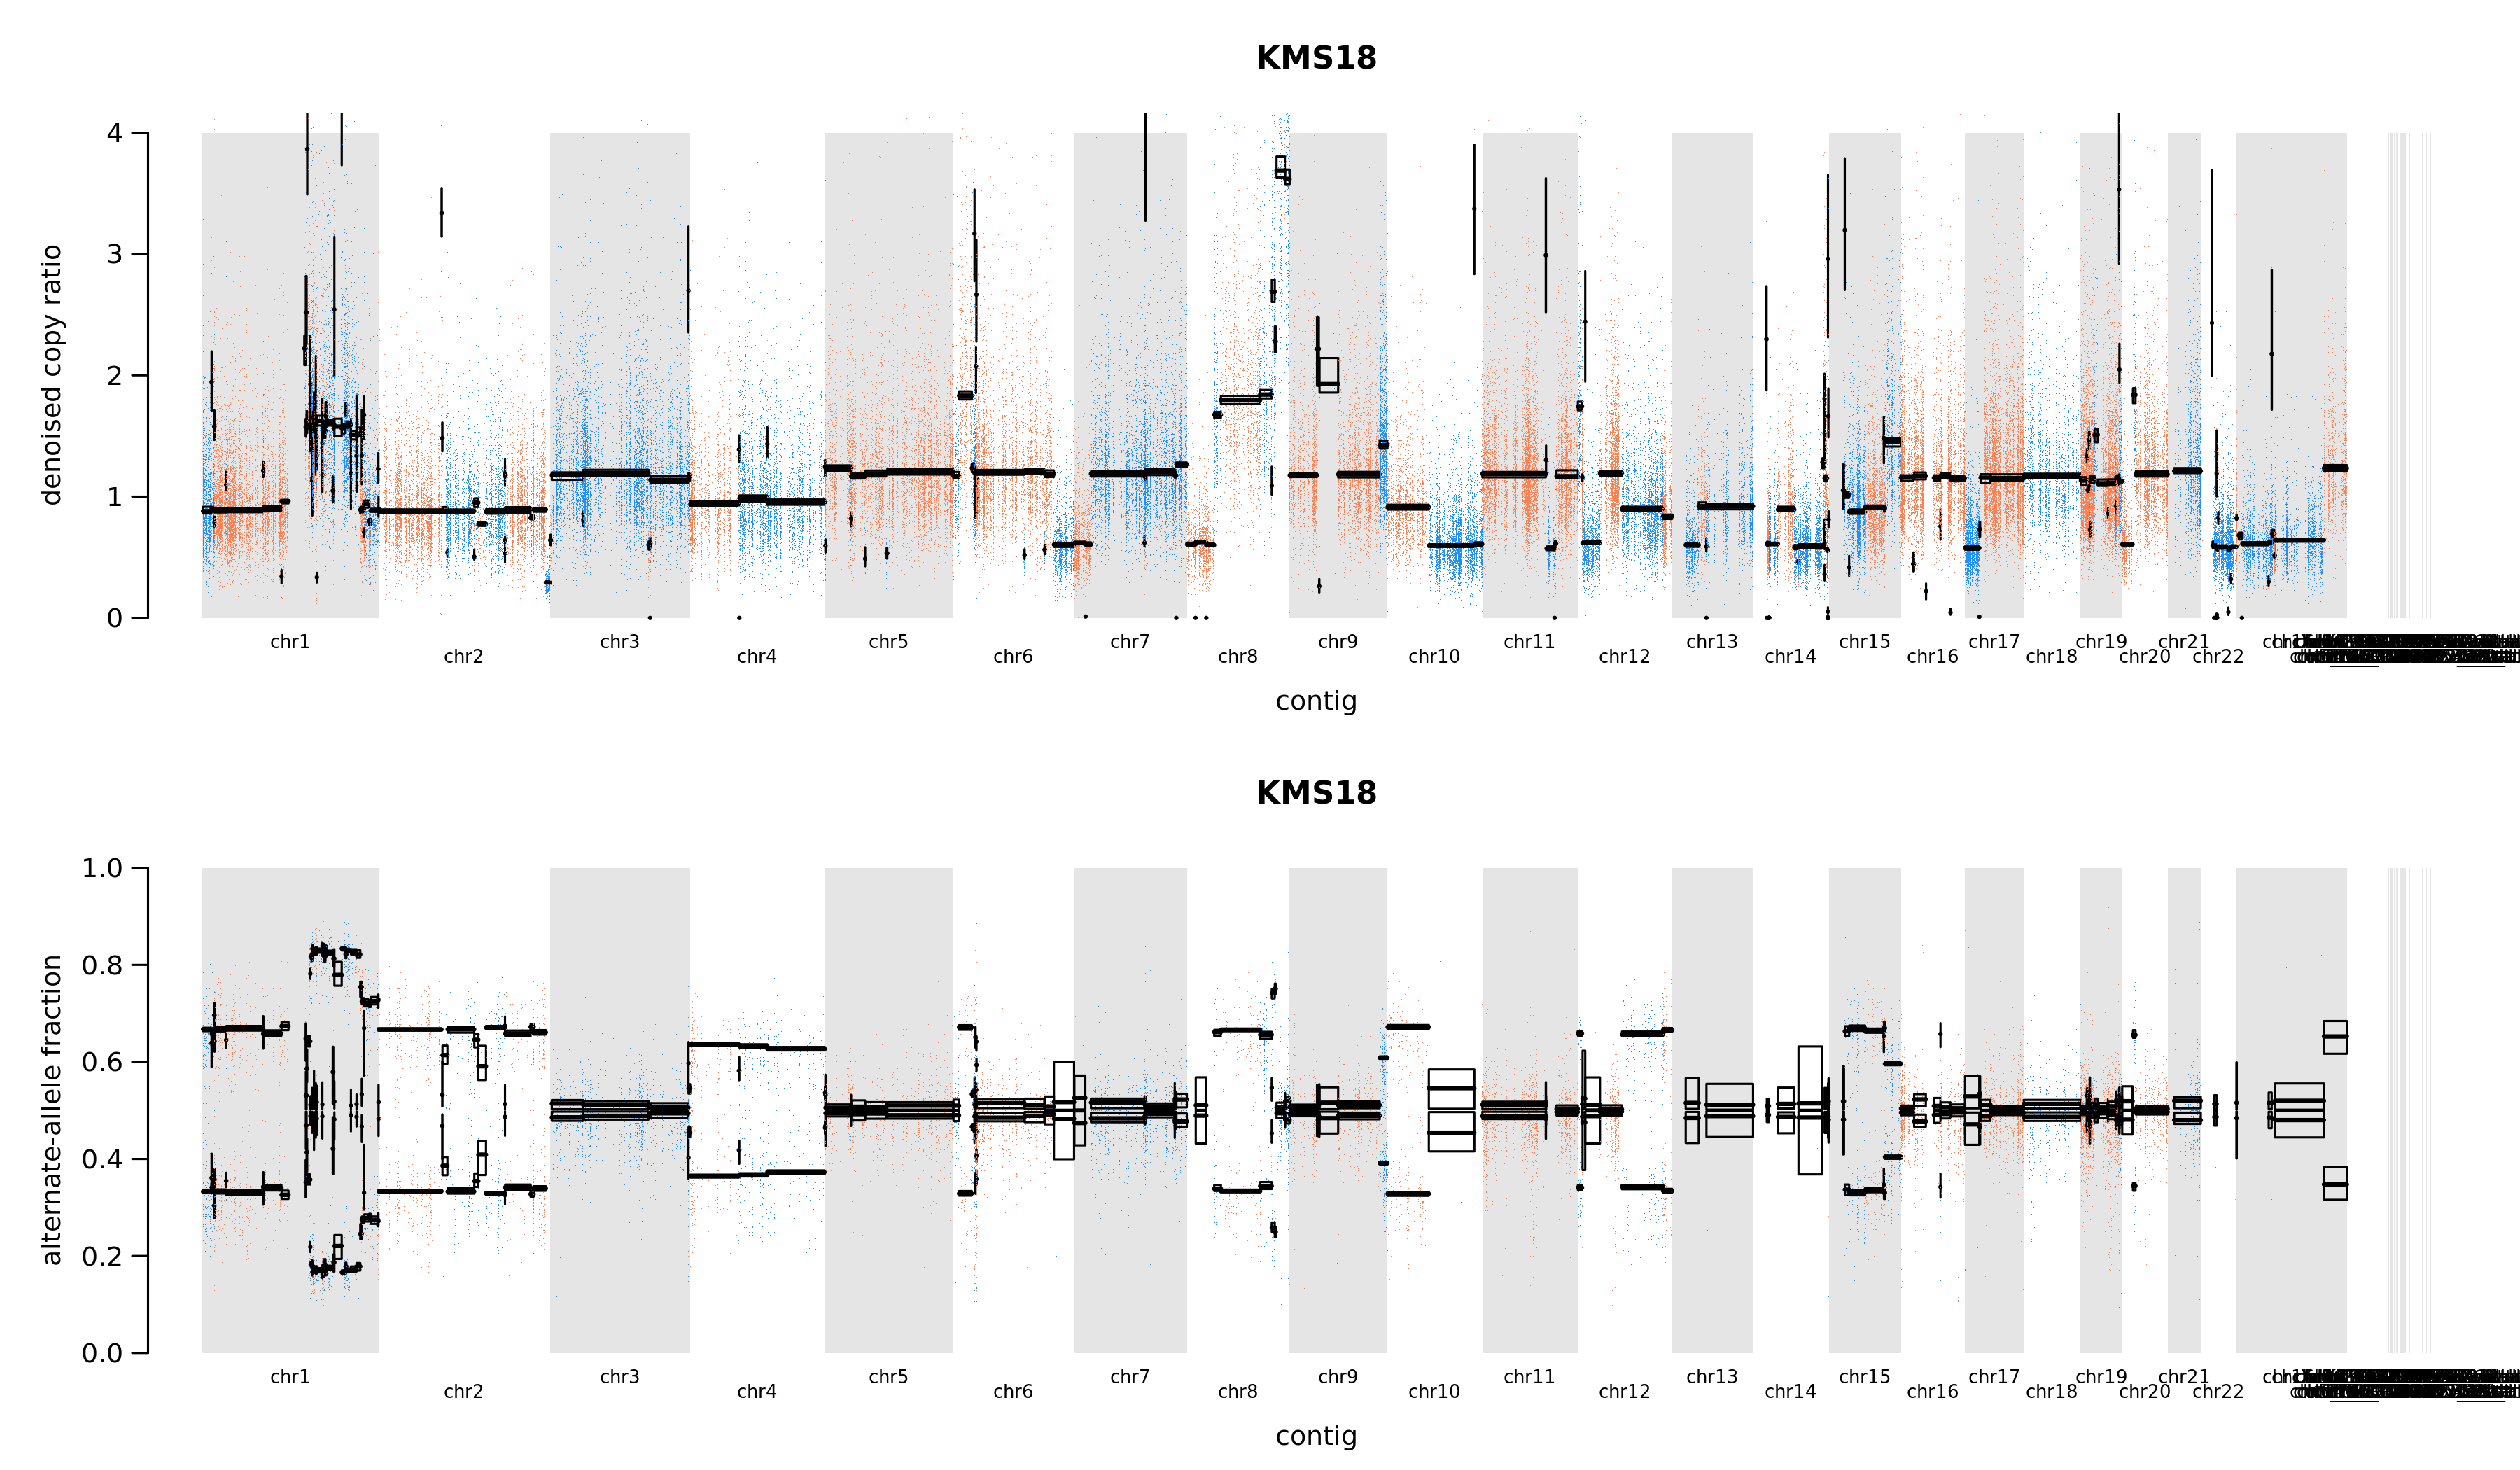

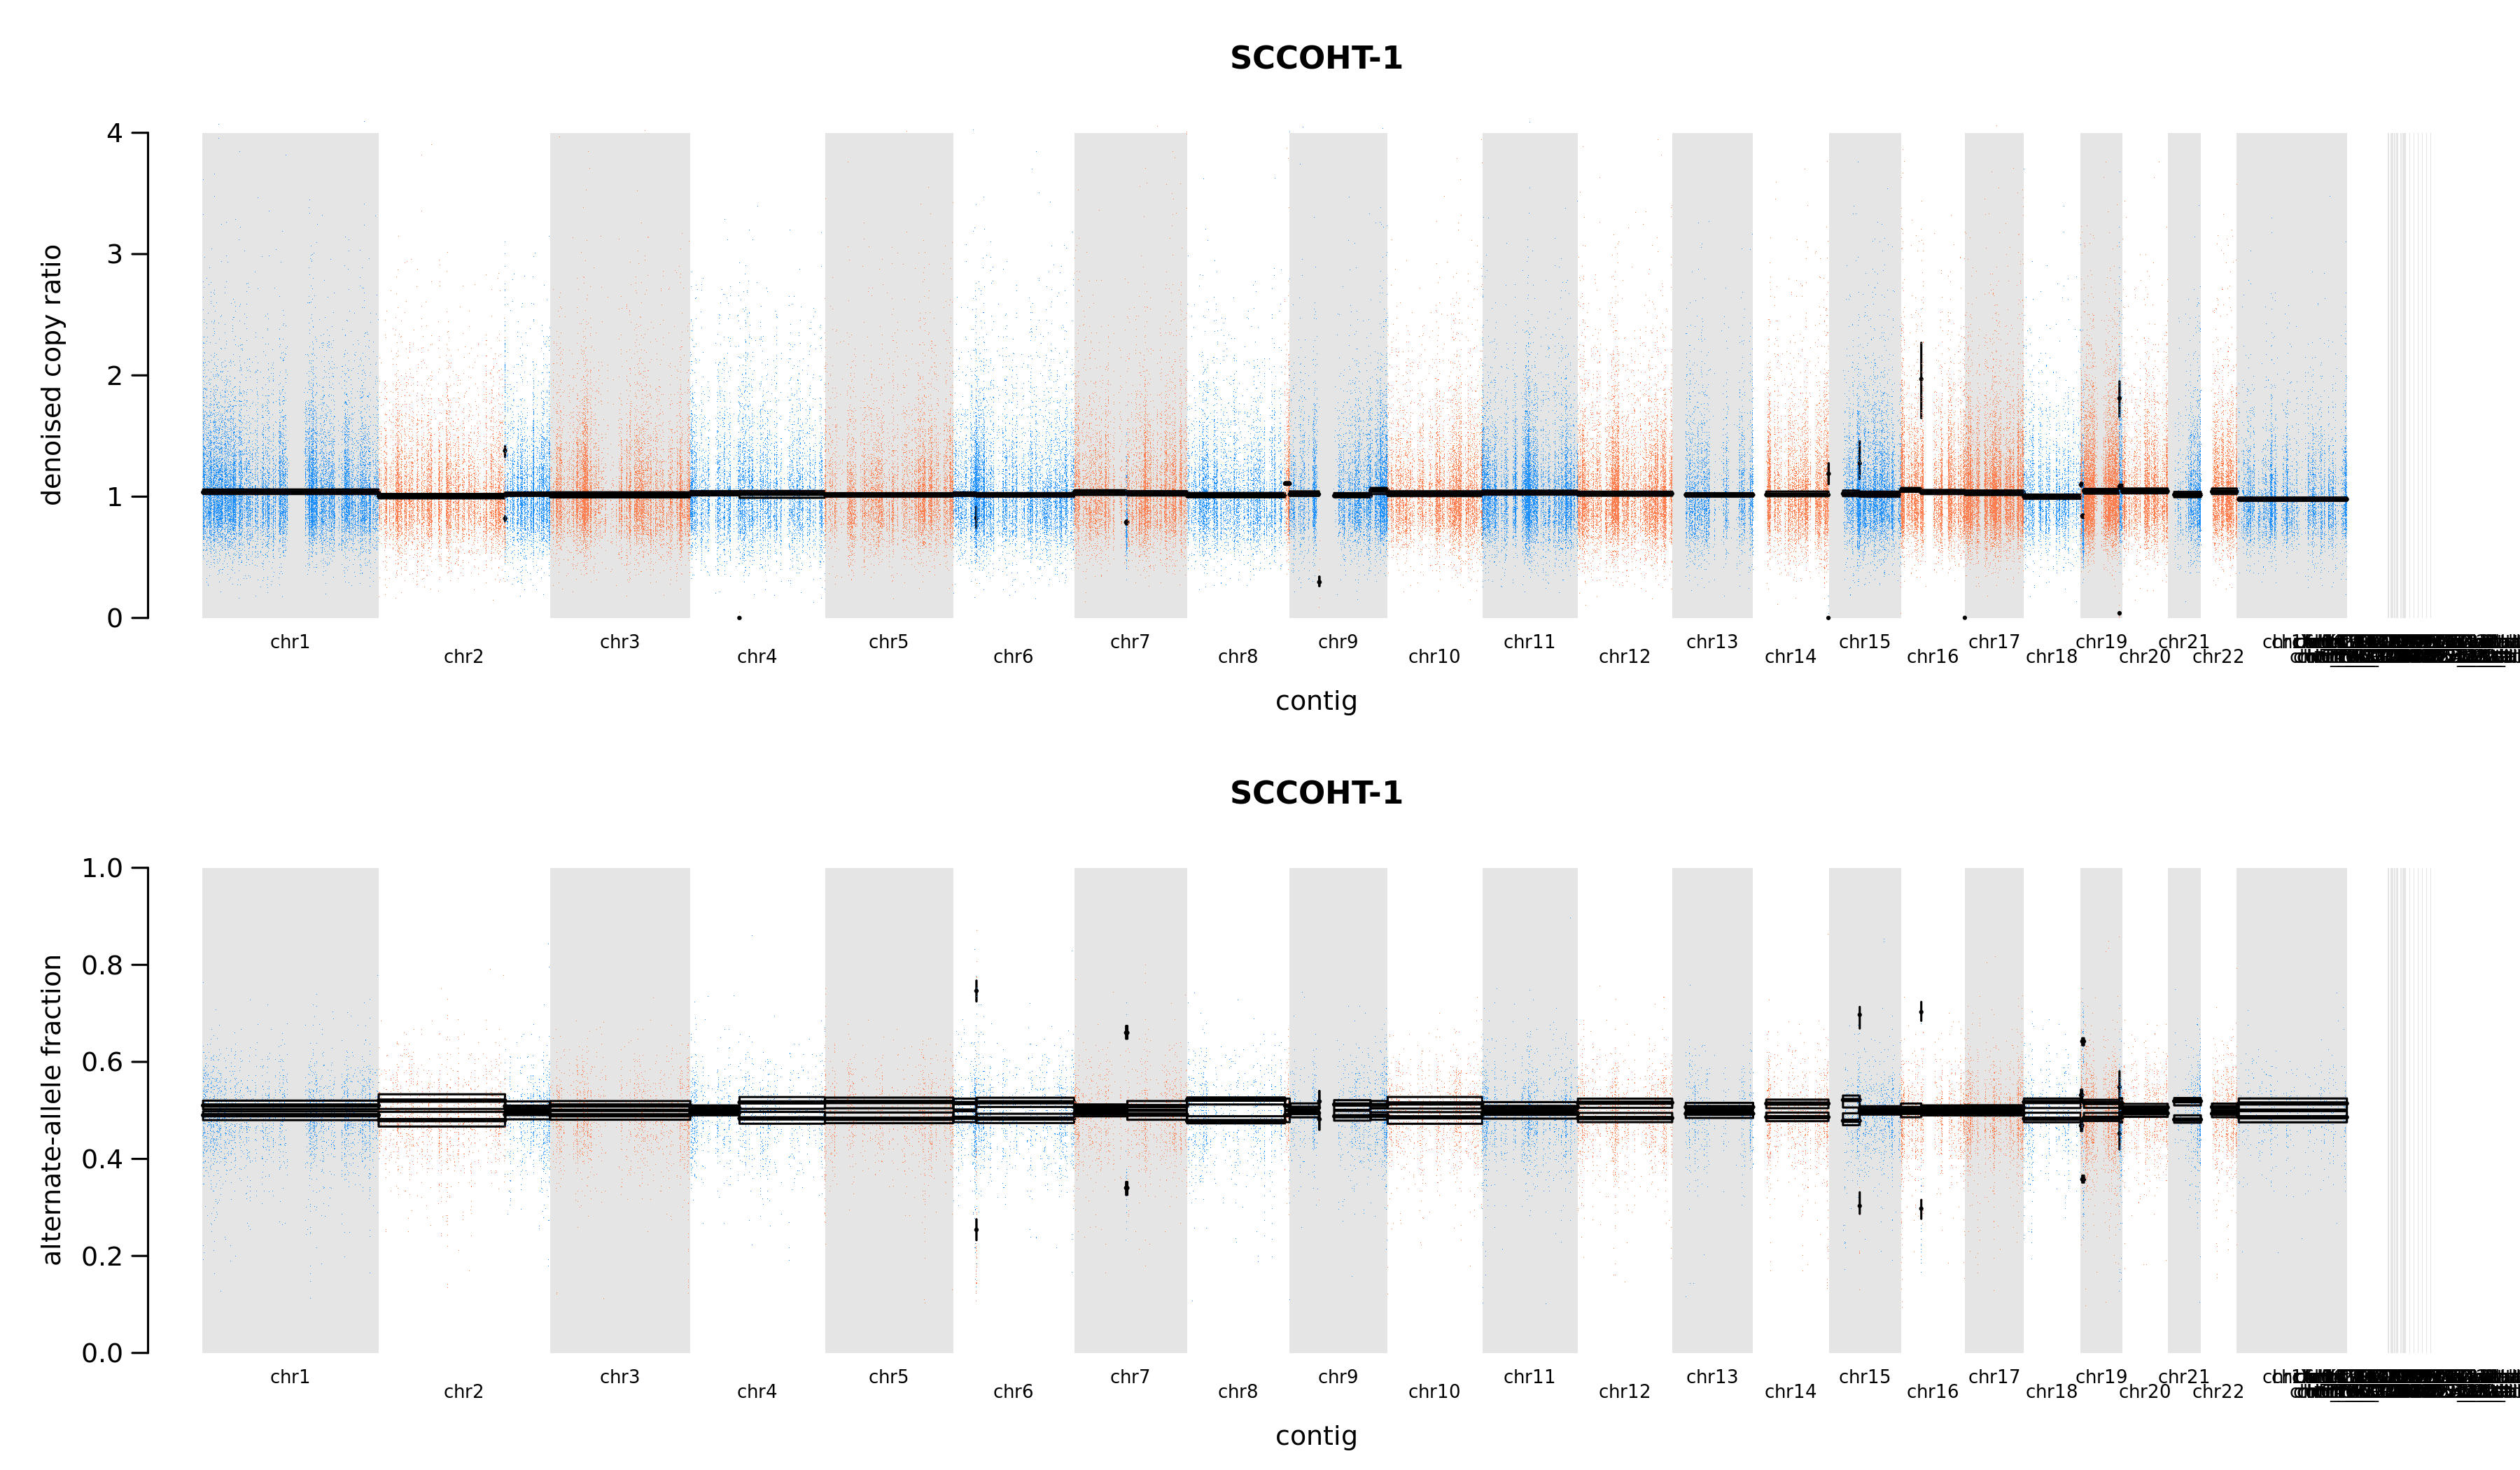

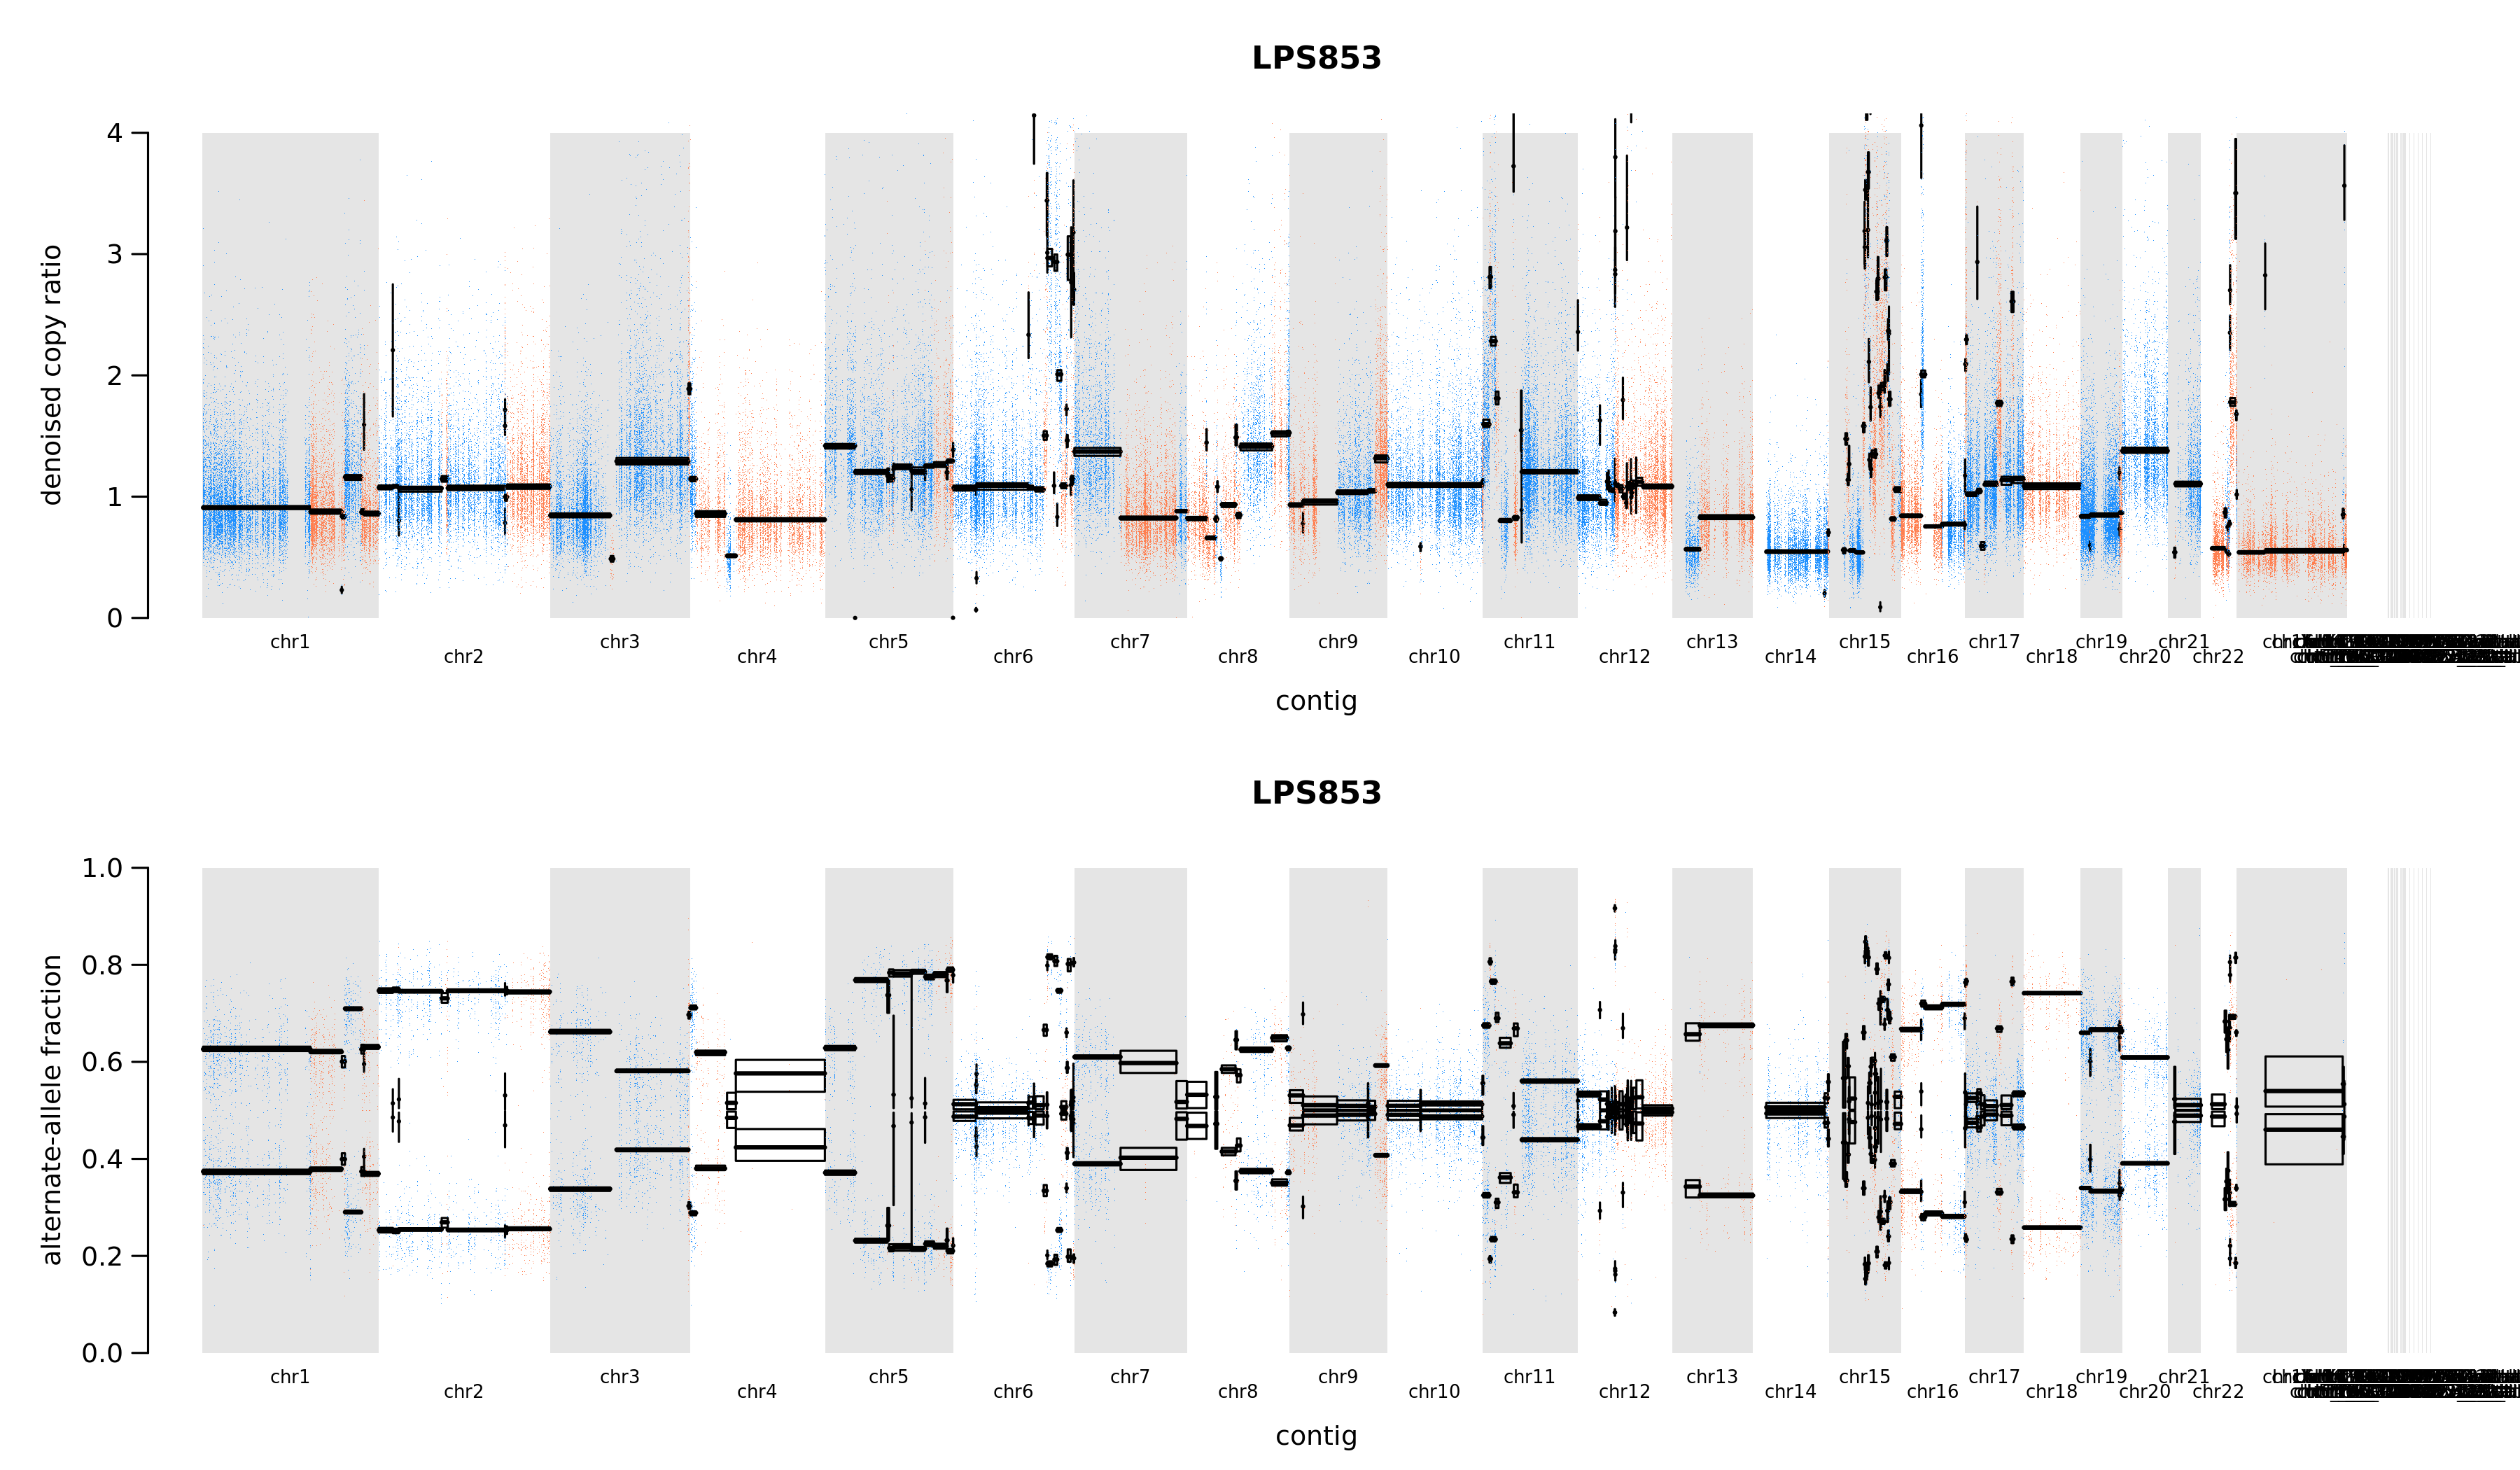

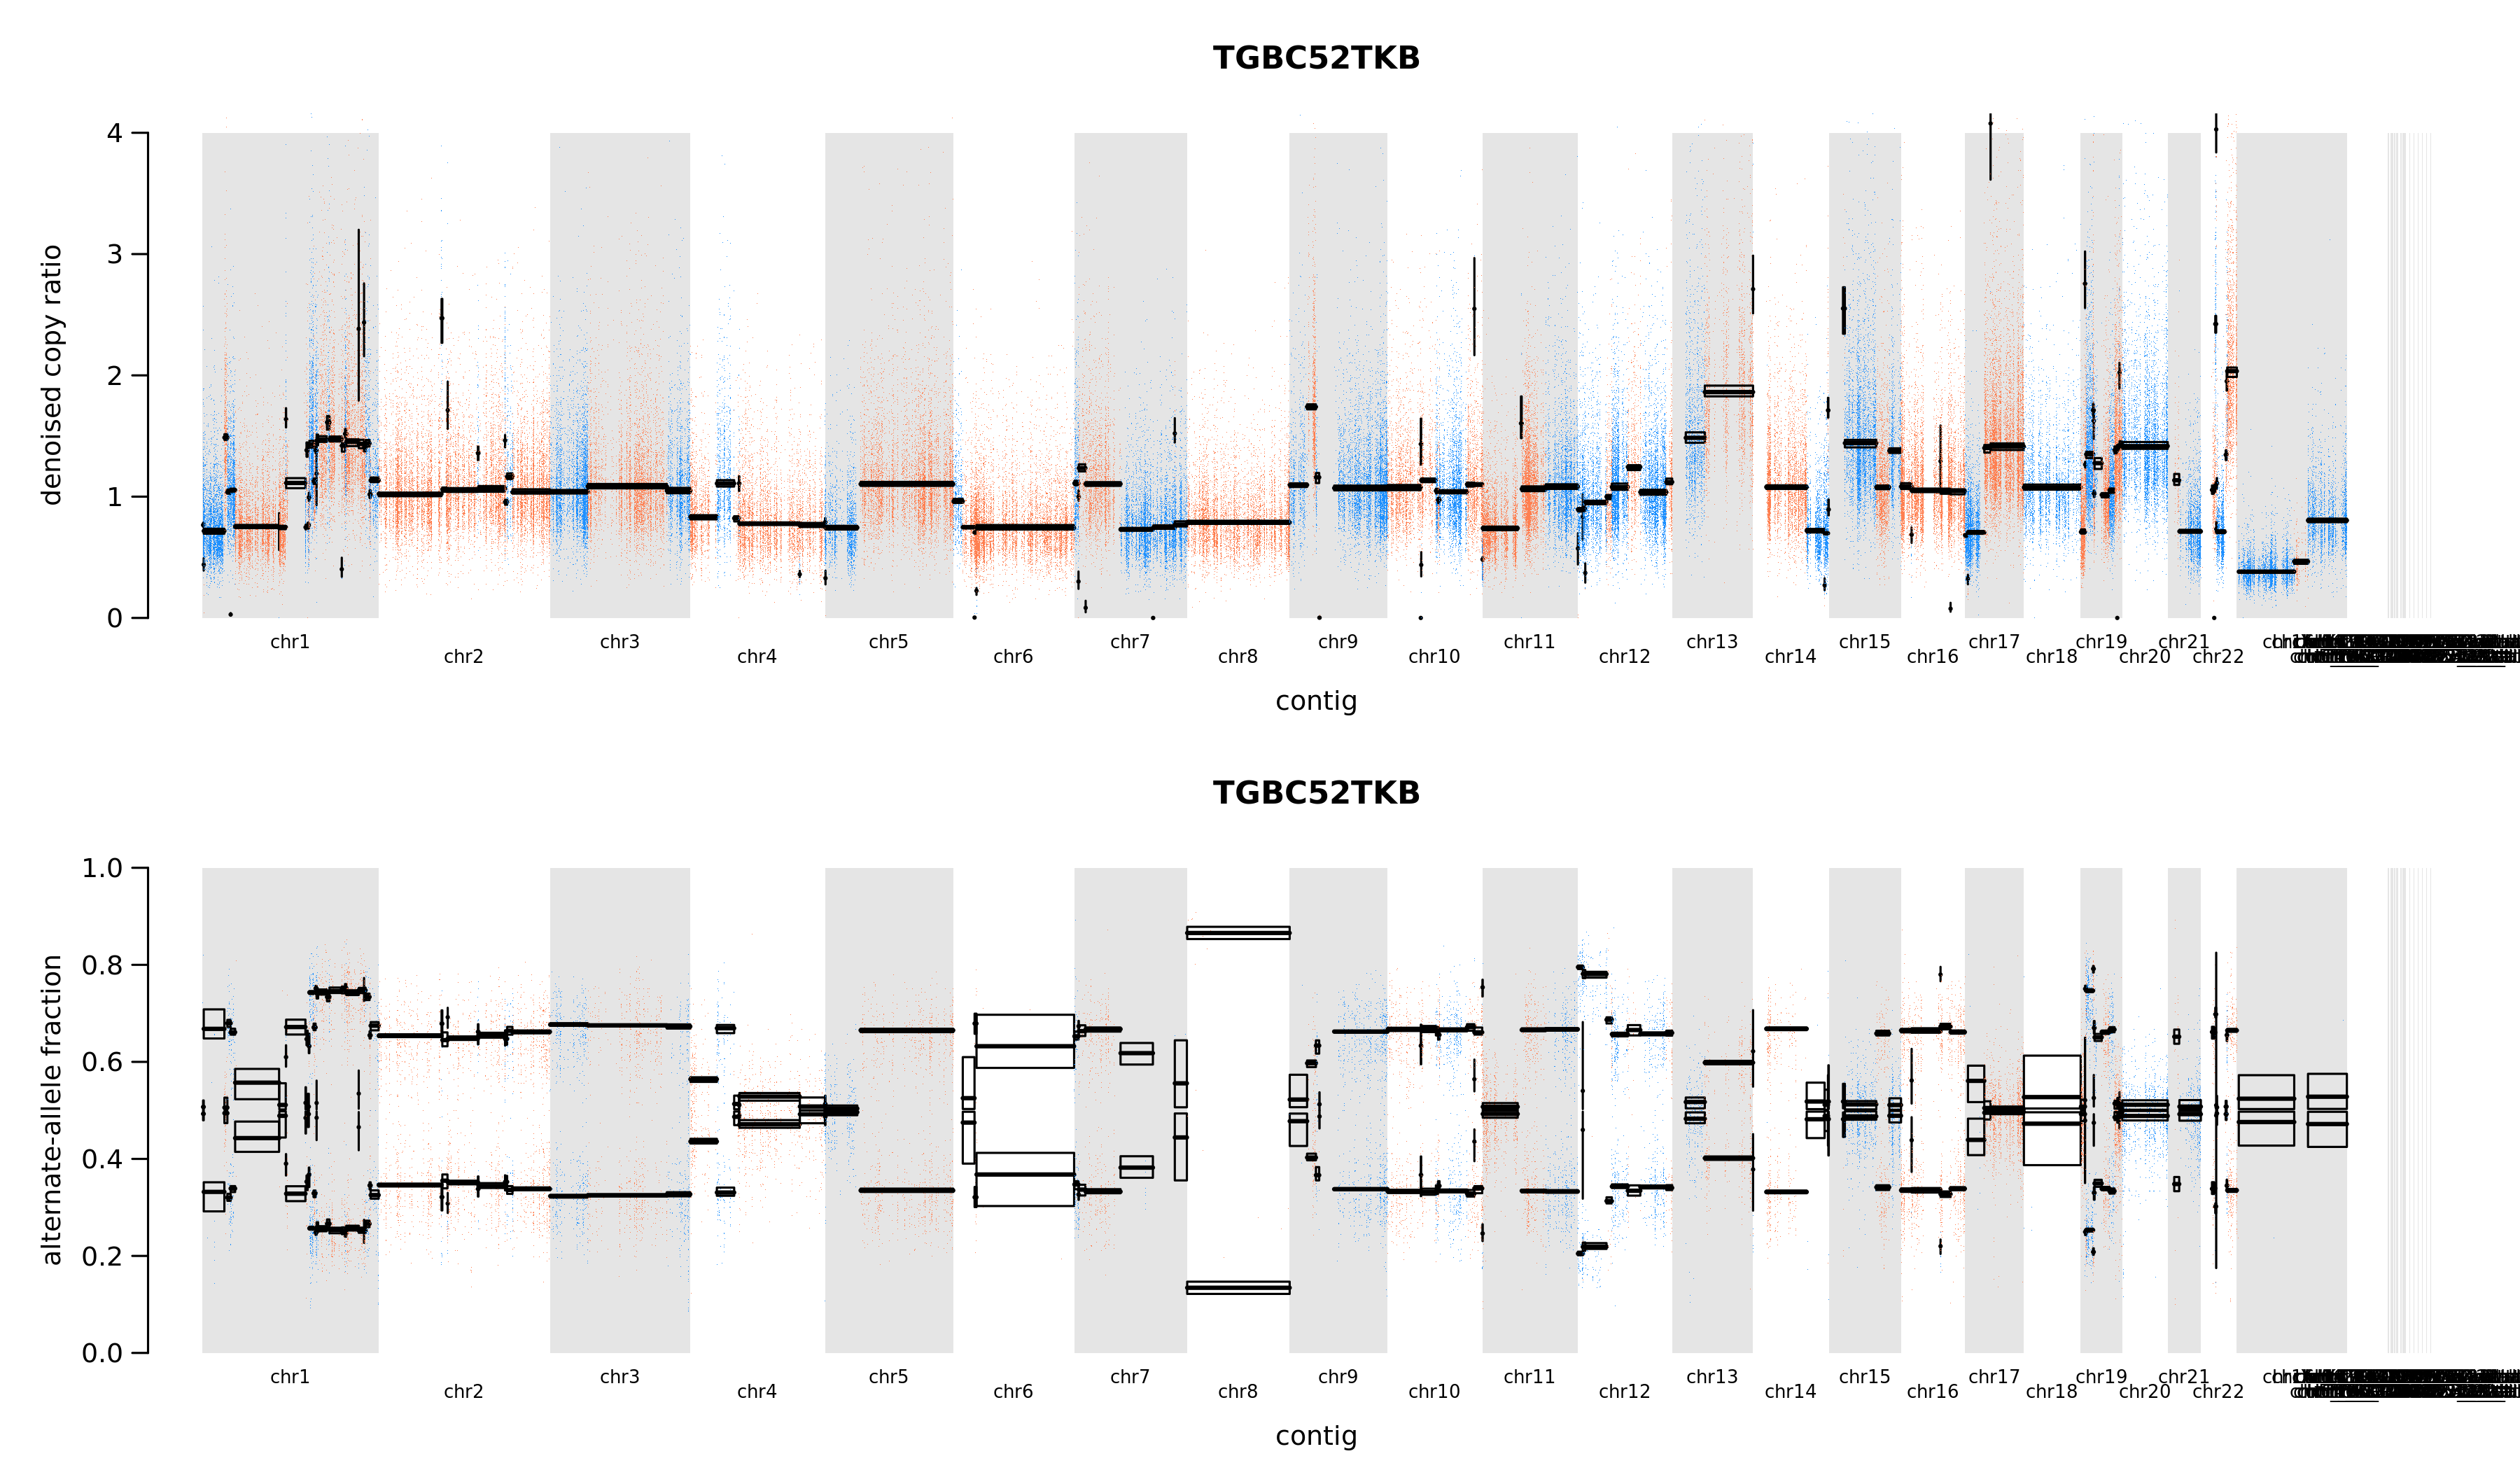

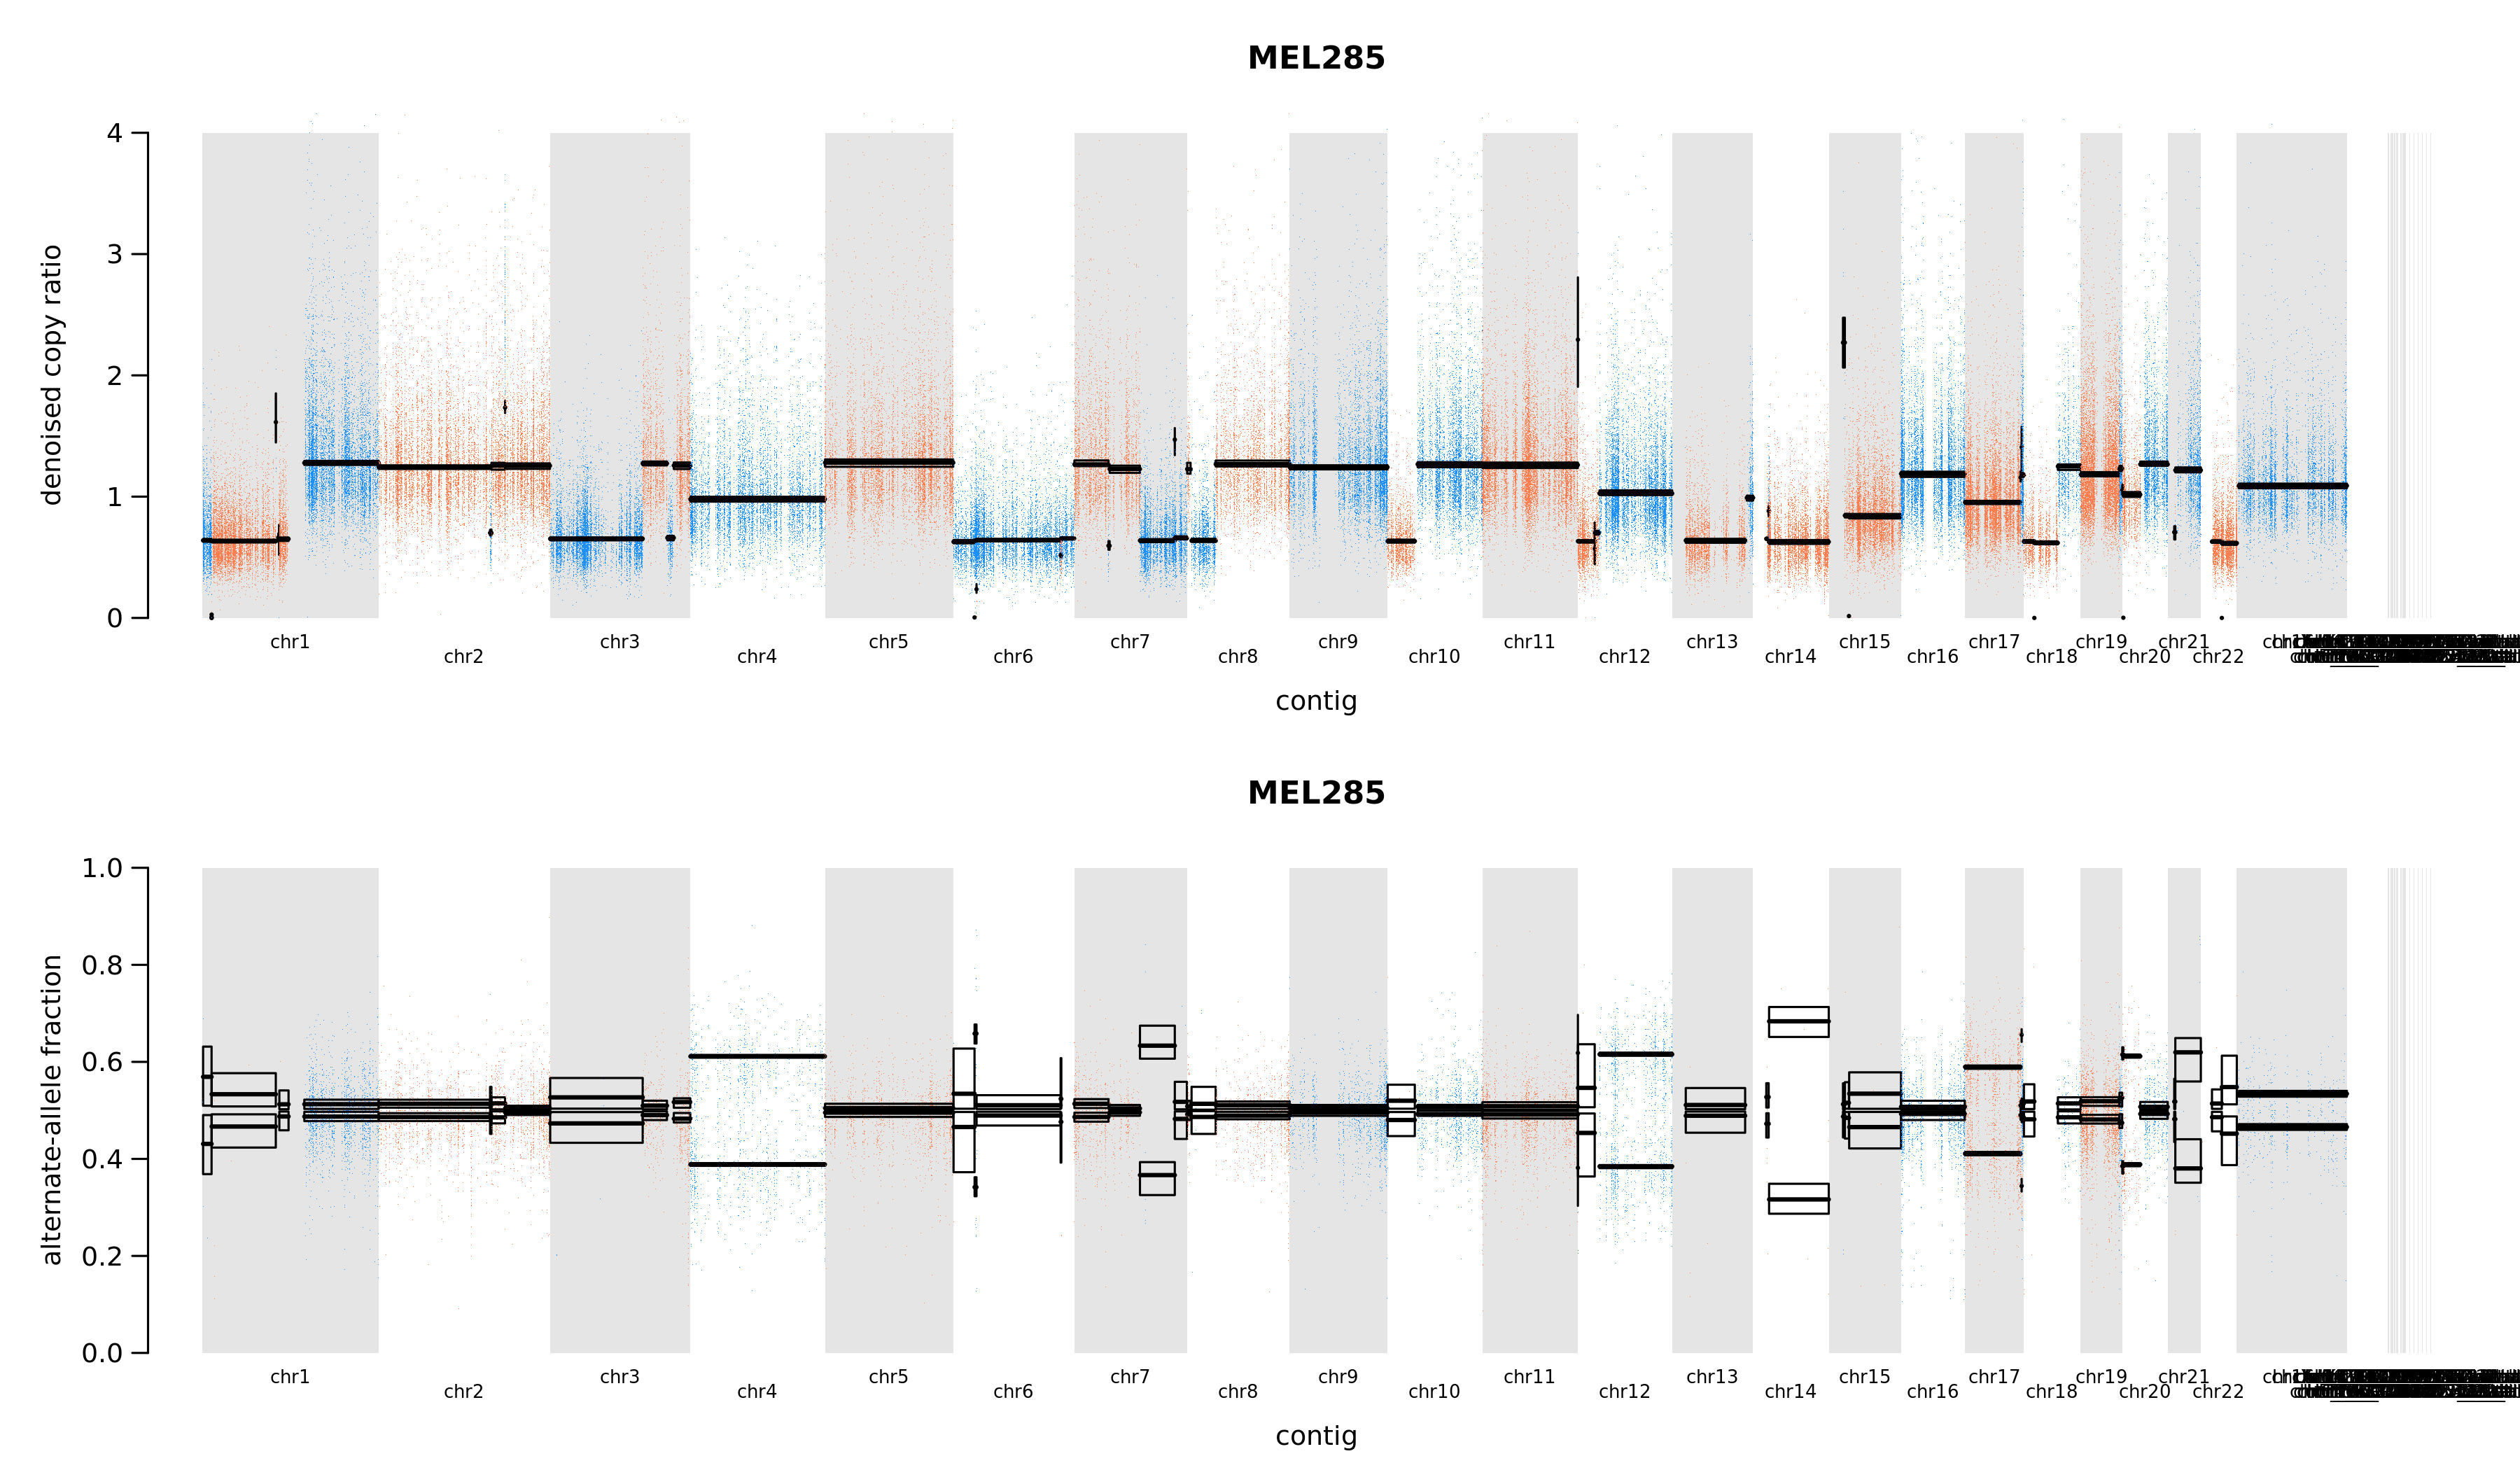

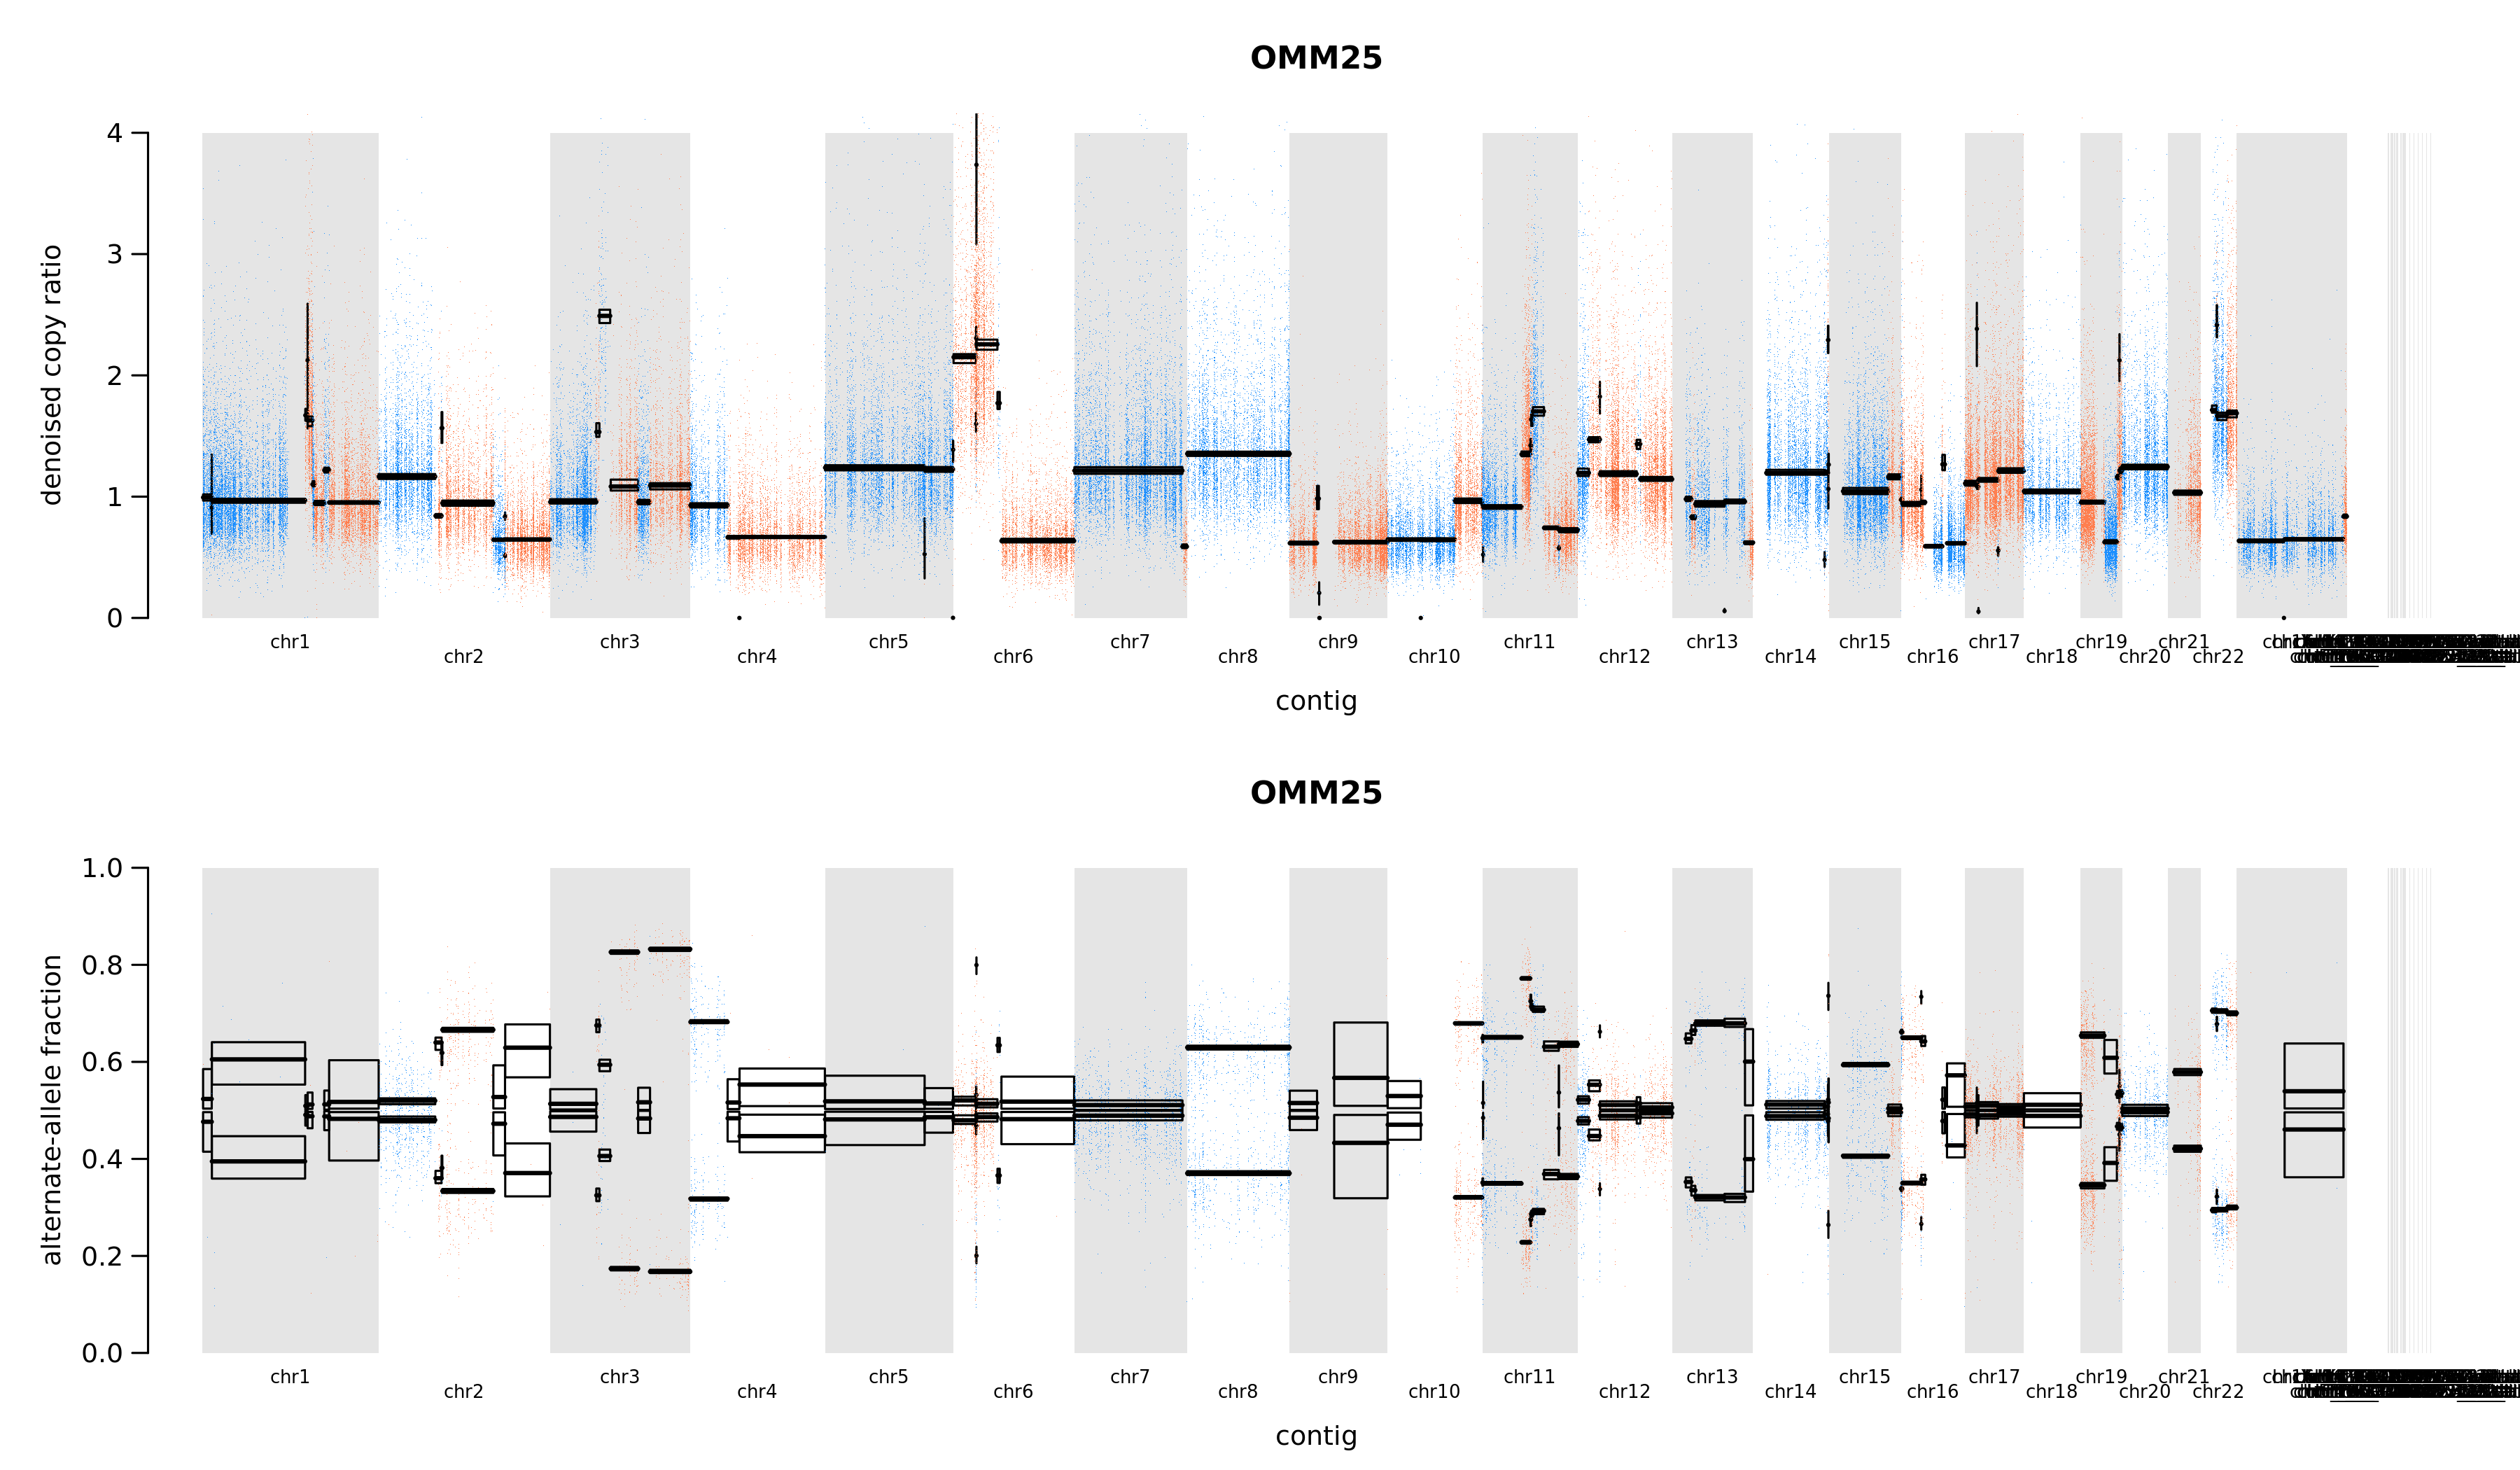

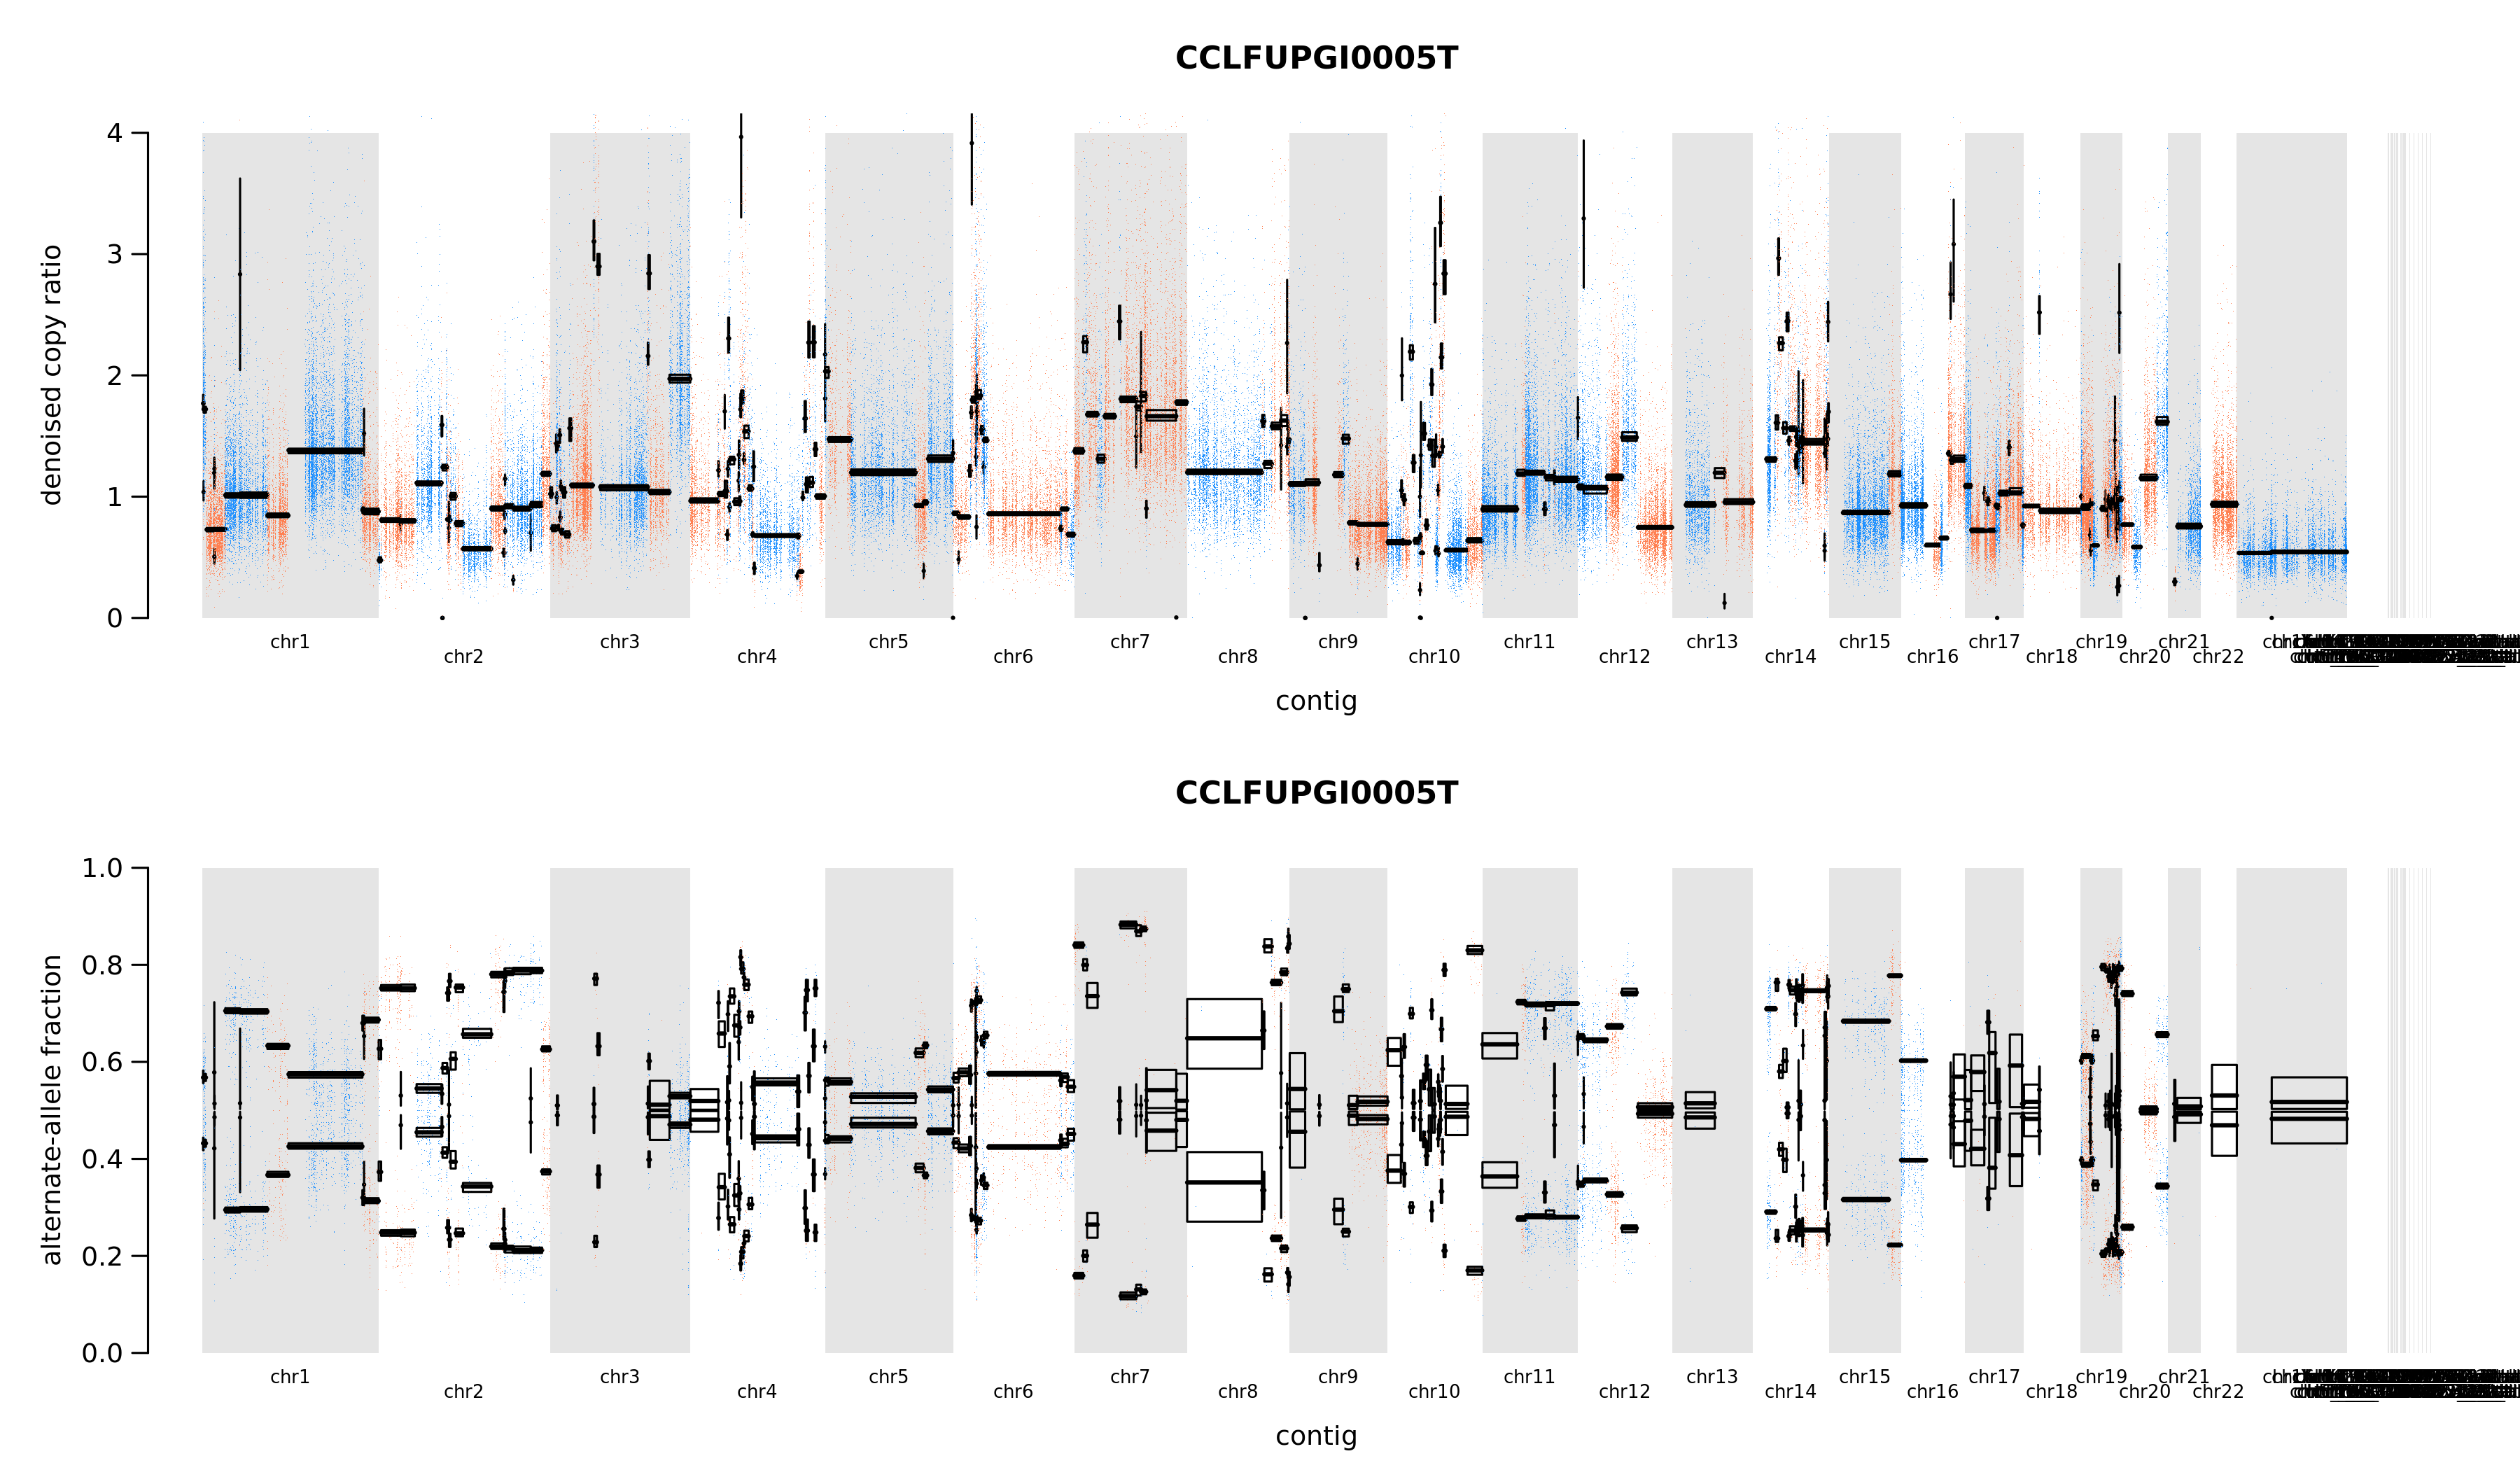

In [10]:
for plot in plots:
    display(Image('temp/'+plot.split('/')[-1]))

In [195]:
genecn.to_csv('temp/wes.'+release+'.gene.cn')
segmentcn.to_csv('temp/wes.'+release+'.segmented.cn')

KeyboardInterrupt: 

In [182]:
## for genecn removing first blacklisted, then embargoed, to create two datasets
genecn = genecn.apply(lambda x: np.log2(1+x))
for i in genecn.index:
    if i in blacklisted:
        genecn = genecn.drop(i)
genecn.to_csv('temp/wes.'+release+'.blacklisted.gene.cn')
for i in genecn.index:
    if i in embargoed:
        genecn = genecn.drop(i)
genecn.to_csv('temp/wes.'+release+'.embargoed.gene.cn')

In [179]:
## for segment removing first blacklisted, then embargoed, to create two datasets
segmentcn['Segment_Mean'] = segmentcn['Segment_Mean'].apply(lambda x: np.log2(1+x))
for i, val in segmentcn.iterrows():
    if val['DepMap_ID'] in blacklisted:
        segmentcn = segmentcn.drop(i)
segmentcn.to_csv('temp/wes.'+release+'.blacklisted.segmented.cn')
for i, val in segmentcn.iterrows():
    if val['DepMap_ID'] in embargoed:
        segmentcn = segmentcn.drop(i)
segmentcn.to_csv('temp/wes.'+release+'.embargoed.segmented.cn')

In [180]:
segmentcn

DepMap_ID Chromosome        Start          End  Num_Probes  \
0       ACH-000001          1          1.0    1969745.0         286   
1       ACH-000001          1    1969746.0    6354345.0         365   
2       ACH-000001          1    6354346.0    6958256.0         100   
3       ACH-000001          1    6958257.0   15977206.0         884   
4       ACH-000001          1   15977207.0   16174774.0          57   
5       ACH-000001          1   16174775.0   16275770.0          19   
6       ACH-000001          1   16275771.0   19181515.0         296   
7       ACH-000001          1   19181516.0   20085476.0         120   
8       ACH-000001          1   20085477.0   34488045.0        1590   
9       ACH-000001          1   34488046.0   35149857.0          39   
10      ACH-000001          1   35149858.0   45580589.0        1334   
11      ACH-000001          1   45580590.0   45625663.0          21   
12      ACH-000001          1   45625664.0   52775813.0         541   
13      ACH-000001          1   52775814.0   53770180.0          92   
14      ACH-000001          1   53770181.0   64050331.0         563   
15      ACH-000001          1   64050332.0   64680506.0          37   
16      ACH-000001          1   64680507.0   73154653.0         373   
17      ACH-000001          1   73154654.0   93020476.0         942   
18      ACH-000001          1   93020477.0   93658478.0          73   
19      ACH-000001          1   93658479.0  114548094.0        1053   
20      ACH-000001          1  114548095.0  116710409.0          57   
21      ACH-000001          1  116710410.0  149280172.0         459   
22      ACH-000001          1  149280173.0  149800279.0           5   
23      ACH-000001          1  149800280.0  154092264.0         766   
24      ACH-000001          1  154092265.0  154797240.0         167   
25      ACH-000001          1  154797241.0  155501774.0         265   
26      ACH-000001          1  155501775.0  155699377.0          16   
27      ACH-000001          1  155699378.0  156188422.0         132   
28      ACH-000001          1  156188423.0  156563432.0         114   
29      ACH-000001          1  156563433.0  183224465.0        2071   
...            ...        ...          ...          ...         ...   
327861  ACH-000272      chr16          1.0    1259786.0         448   
327862  ACH-000272      chr16    1259787.0   14747778.0        1541   
327863  ACH-000272      chr16   14747779.0   15030896.0          32   
327864  ACH-000272      chr16   15030897.0   15247488.0          40   
327865  ACH-000272      chr16   15247489.0   15574637.0          12   
327866  ACH-000272      chr16   15574638.0   18436024.0         162   
327867  ACH-000272      chr16   18436025.0   55791519.0        2380   
327868  ACH-000272      chr16   55791520.0   55822536.0           7   
327869  ACH-000272      chr16   55822537.0   90338345.0        3201   
327870  ACH-000272      chr17          1.0   83257441.0       10953   
327871  ACH-000272      chr18          1.0   80373285.0        3036   
327872  ACH-000272      chr19          1.0    2026721.0         529   
327873  ACH-000272      chr19    2026722.0   13212300.0        2670   
327874  ACH-000272      chr19   13212301.0   13757630.0          43   
327875  ACH-000272      chr19   13757631.0   19528530.0        1413   
327876  ACH-000272      chr19   19528531.0   29613510.0         203   
327877  ACH-000272      chr19   29613511.0   54749517.0        4681   
327878  ACH-000272      chr19   54749518.0   54880300.0          50   
327879  ACH-000272      chr19   54880301.0   58617616.0         685   
327880  ACH-000272      chr20          1.0   64444167.0        4677   
327881  ACH-000272      chr21          1.0   10542887.0           9   
327882  ACH-000272      chr21   10542888.0   25707761.0         188   
327883  ACH-000272      chr21   25707762.0   25710836.0           1   
327884  ACH-000272      chr21   25710837.0   46709983.0        1753   
327885  ACH-000272      chr22    

# Upload to taiga

In [194]:
tc.update_dataset(dataset_permaname="segmented-cn-wes-prioritzed-7fe1", 
                  upload_file_path_dict={'temp/wes.'+release+'.gene.cn': 'NumericMatrixCSV',
                                        'temp/wes.'+release+'.segmented.cn': 'TableCSV',
                                        'temp/wes.'+release+'.embargoed.gene.cn': 'NumericMatrixCSV','temp/wes.'+release+'.embargoed.segmented.cn': 'TableCSV',
                                         'temp/wes.'+release+'.blacklisted.gene.cn': 'NumericMatrixCSV',
                                         'temp/wes.'+release+'.blacklisted.segmented.cn': 'TableCSV'},
                dataset_description="updating to "+release+". Some cells lines have been flagged as: \n \
                - having bad looking copy ration plots = [] \n \
                 - having too many segments = [] \n \
                  - Genes having a similar CN value accross all []",
                 )

Uploading wes.19Q3.gene...
hitting https://cds.team/taiga/api/datafile/cdf777d6f7e5435d9f8a412574ddc284
Conversion and upload...:
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Scanning through file to determine size (line 1001)
	 Conversion in progress, line 250
	 Conversion in progress, line 250
	 Conversion in progress, line 250
	 Conversion in progress, line 250
	 Conversion in progress, line 250
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 500
	 Conversion in progress, line 750
	 Conversion in progress, line 750
	 Conversion in progress, line 750
	 Conversion in progress, line 750
	 Conversion in progress, line 750
	 

AttributeError: 'dict' object has no attribute 'message'